# GLASSDOOR REVIEW PROJECT

This project looks at the various reviews from employees that may have worked in an organisation. A Glassdoor review is a review of a company's overall work environment. Reviews are posted by current and former employees who can leave honest comments about compensation, work conditions, promotion opportunities, and so on.

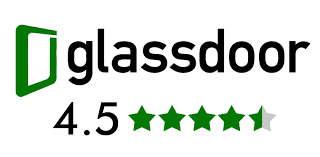

#### Importing necessary libaries



In [57]:
import pandas as pd
import numpy as np
import textblob
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

from tabulate import tabulate

The data has already been downloaded to this PC. Let's get the path

In [3]:
data= 'C:/Users/DELL/Documents/Python haddy/dataset'

In [4]:
os.listdir(data)

['.ipynb_checkpoints',
 '.jovianrc',
 'AppleStore.csv',
 'archive (6)',
 'archive (7)',
 'archive (8)',
 'archive (9)',
 'Comcast_telecom_complaints_data.csv',
 'dataset.csv',
 'fx_data.csv',
 'Glassdoor Reviews.ipynb',
 'glassdoor_reviews.csv',
 'indiff_rec.csv',
 'not_rec.csv',
 'rec.csv',
 'rec.xls',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [5]:
gd = pd.read_csv('C:/Users/DELL/Documents/Python haddy/dataset/glassdoor_reviews.csv')
gd

,Unnamed: 0,column_label,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,...,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,use
0,1,1,Sotheby-s,2021-05-25,Financial Analyst,"Former Employee, more than 1 year","New York, NY",1,1.0,1.0,...,1.0,2.0,1.0,x,r,x,Don't do it,People in leadership roles have been there for...,Pressure to do whatever the leaders want\r\nNo...,NaN
1,2,1,Sotheby-s,2021-05-25,Administrator,Former Employee,Hong Kong,4,4.0,5.0,...,3.0,4.0,4.0,o,o,o,international auction house,"great exposure, respectful environment and bea...",OT during peak seasons and often underpaid,NaN
2,3,1,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",4,5.0,4.0,...,5.0,4.0,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation,NaN
3,4,1,Sotheby-s,2021-05-22,Anonymous Employee,Current Employee,Hong Kong,3,2.0,2.0,...,3.0,2.0,3.0,o,o,o,Review,"Exposure to artworks, great team of specialists","Work life balance, company culture",NaN
4,5,1,Sotheby-s,2021-05-15,Administrator,"Current Employee, less than 1 year","London, England, England",4,4.0,4.0,...,3.0,3.0,3.0,v,r,v,Fun job and nice people but huge workload and ...,"Fantastic art, nice enthusiastic people and a ...",Very low pay and huge workload,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838561,838562,71,Department-for-Work-And-Pensions,2010-09-03,Analyst,Former Employee,"London, England, England",2,4.0,NaN,...,2.0,2.0,3.0,o,v,o,DWP Analyst Position,Workforce consists of highly motivated and int...,Often too relaxed and many lack much drive on ...,NaN
838562,838563,71,Department-for-Work-And-Pensions,2010-04-25,Assistant Economist,Current Employee,"London, England, England",3,5.0,NaN,...,5.0,1.0,2.0,o,r,o,Stress free job with very strong work life bal...,Only 36 hours a week.\r\nLots of opportunities...,Pay is OK at first but with little growth or b...,NaN
838563,838564,71,Department-for-Work-And-Pensions,2009-11-08,Private Secretary,Current Employee,"London, England, England",4,4.0,NaN,...,4.0,2.0,3.0,v,v,o,Inner workings - interesting,"Big department, with lots of opportunities to ...",Long hours tend to be unrewarded when they hap...,NaN
838564,838565,71,Department-for-Work-And-Pensions,2009-07-16,DASO Jobcentre,Current Employee,"Newport, Newport, Wales, Wales",4,5.0,NaN,...,3.0,3.0,2.0,v,x,o,Band B - AO,Safe place to work when in recession. People ...,90% of the time its only a very short contract...,NaN


## Data Exploration and Data Cleaning

In [6]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838566 entries, 0 to 838565
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           838566 non-null  int64  
 1   column_label         838566 non-null  int64  
 2   firm                 838566 non-null  object 
 3   date_review          838566 non-null  object 
 4   job_title            838566 non-null  object 
 5   current              838566 non-null  object 
 6   location             541228 non-null  object 
 7   overall_rating       838566 non-null  int64  
 8   work_life_balance    688672 non-null  float64
 9   culture_values       647193 non-null  float64
 10  diversity_inclusion  136066 non-null  float64
 11  career_opp           691065 non-null  float64
 12  comp_benefits        688484 non-null  float64
 13  senior_mgmt          682690 non-null  float64
 14  recommend            838566 non-null  object 
 15  ceo_approv       

In [7]:
gd.describe()

,Unnamed: 0,column_label,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,use
count,838566.000000,838566.000000,838566.000000,688672.000000,647193.000000,136066.000000,691065.000000,688484.000000,682690.000000,0.0
mean,419283.500000,1004.255072,3.655956,3.375735,3.590164,3.966612,3.461825,3.398109,3.176576,NaN
std,242073.297255,1246.148565,1.174684,1.305874,1.323280,1.190937,1.271295,1.218738,1.330720,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,209642.250000,113.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,NaN
50%,419283.500000,440.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,NaN
75%,628924.750000,1495.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,NaN
max,838566.000000,6044.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


In [8]:
gdd=gd.drop(['column_label', 'Unnamed: 0','use'], axis=1)
gdd

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,Sotheby-s,2021-05-25,Financial Analyst,"Former Employee, more than 1 year","New York, NY",1,1.0,1.0,1.0,1.0,2.0,1.0,x,r,x,Don't do it,People in leadership roles have been there for...,Pressure to do whatever the leaders want\r\nNo...
1,Sotheby-s,2021-05-25,Administrator,Former Employee,Hong Kong,4,4.0,5.0,4.0,3.0,4.0,4.0,o,o,o,international auction house,"great exposure, respectful environment and bea...",OT during peak seasons and often underpaid
2,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",4,5.0,4.0,4.0,5.0,4.0,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation
3,Sotheby-s,2021-05-22,Anonymous Employee,Current Employee,Hong Kong,3,2.0,2.0,3.0,3.0,2.0,3.0,o,o,o,Review,"Exposure to artworks, great team of specialists","Work life balance, company culture"
4,Sotheby-s,2021-05-15,Administrator,"Current Employee, less than 1 year","London, England, England",4,4.0,4.0,3.0,3.0,3.0,3.0,v,r,v,Fun job and nice people but huge workload and ...,"Fantastic art, nice enthusiastic people and a ...",Very low pay and huge workload
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838561,Department-for-Work-And-Pensions,2010-09-03,Analyst,Former Employee,"London, England, England",2,4.0,NaN,NaN,2.0,2.0,3.0,o,v,o,DWP Analyst Position,Workforce consists of highly motivated and int...,Often too relaxed and many lack much drive on ...
838562,Department-for-Work-And-Pensions,2010-04-25,Assistant Economist,Current Employee,"London, England, England",3,5.0,NaN,NaN,5.0,1.0,2.0,o,r,o,Stress free job with very strong work life bal...,Only 36 hours a week.\r\nLots of opportunities...,Pay is OK at first but with little growth or b...
838563,Department-for-Work-And-Pensions,2009-11-08,Private Secretary,Current Employee,"London, England, England",4,4.0,NaN,NaN,4.0,2.0,3.0,v,v,o,Inner workings - interesting,"Big department, with lots of opportunities to ...",Long hours tend to be unrewarded when they hap...
838564,Department-for-Work-And-Pensions,2009-07-16,DASO Jobcentre,Current Employee,"Newport, Newport, Wales, Wales",4,5.0,NaN,NaN,3.0,3.0,2.0,v,x,o,Band B - AO,Safe place to work when in recession. People ...,90% of the time its only a very short contract...


In [9]:
gdd.isnull().sum()

firm                        0
date_review                 0
job_title                   0
current                     0
location               297338
overall_rating              0
work_life_balance      149894
culture_values         191373
diversity_inclusion    702500
career_opp             147501
comp_benefits          150082
senior_mgmt            155876
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2219
pros                        0
cons                        8
dtype: int64

Let's drop rows with blank location

In [10]:
new_gd= gdd.dropna(subset=['location'])
new_gd

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,Sotheby-s,2021-05-25,Financial Analyst,"Former Employee, more than 1 year","New York, NY",1,1.0,1.0,1.0,1.0,2.0,1.0,x,r,x,Don't do it,People in leadership roles have been there for...,Pressure to do whatever the leaders want\r\nNo...
1,Sotheby-s,2021-05-25,Administrator,Former Employee,Hong Kong,4,4.0,5.0,4.0,3.0,4.0,4.0,o,o,o,international auction house,"great exposure, respectful environment and bea...",OT during peak seasons and often underpaid
2,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",4,5.0,4.0,4.0,5.0,4.0,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation
3,Sotheby-s,2021-05-22,Anonymous Employee,Current Employee,Hong Kong,3,2.0,2.0,3.0,3.0,2.0,3.0,o,o,o,Review,"Exposure to artworks, great team of specialists","Work life balance, company culture"
4,Sotheby-s,2021-05-15,Administrator,"Current Employee, less than 1 year","London, England, England",4,4.0,4.0,3.0,3.0,3.0,3.0,v,r,v,Fun job and nice people but huge workload and ...,"Fantastic art, nice enthusiastic people and a ...",Very low pay and huge workload
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838558,Department-for-Work-And-Pensions,2011-09-18,Administrative Officer,Current Employee,"Wolverhampton, England, England",2,1.0,NaN,NaN,2.0,3.0,2.0,x,x,o,Why did I go to uni? but at least I've got a p...,"pay cheque and flexi -time, managers are not r...","boring, repetitative work on ancient pre-Windo..."
838561,Department-for-Work-And-Pensions,2010-09-03,Analyst,Former Employee,"London, England, England",2,4.0,NaN,NaN,2.0,2.0,3.0,o,v,o,DWP Analyst Position,Workforce consists of highly motivated and int...,Often too relaxed and many lack much drive on ...
838562,Department-for-Work-And-Pensions,2010-04-25,Assistant Economist,Current Employee,"London, England, England",3,5.0,NaN,NaN,5.0,1.0,2.0,o,r,o,Stress free job with very strong work life bal...,Only 36 hours a week.\r\nLots of opportunities...,Pay is OK at first but with little growth or b...
838563,Department-for-Work-And-Pensions,2009-11-08,Private Secretary,Current Employee,"London, England, England",4,4.0,NaN,NaN,4.0,2.0,3.0,v,v,o,Inner workings - interesting,"Big department, with lots of opportunities to ...",Long hours tend to be unrewarded when they hap...


We can infer from the statistical method above that the maximium review point giving is 5 and the least is 1.Also, 75% gave very good review points, 50% gave good review points as well 

In [11]:
new_gd.describe()

,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
count,541228.000000,475001.000000,447610.000000,110713.000000,475872.000000,474867.000000,472097.00000
mean,3.658142,3.388275,3.609149,3.979831,3.475195,3.407322,3.19124
std,1.192523,1.314814,1.329646,1.183869,1.278893,1.225107,1.34126
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.00000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [12]:
new_gd['firm'].unique()

array(['Sotheby-s', 'Equiniti', 'Betsi-Cadwaladr-University-Health-Board',
       'DFS-Furniture', 'Barchester-Healthcare',
       'National-Offender-Management-Service', 'WLT-Group',
       'Countrywide-plc', 'Boots-Opticians', 'Cygnet-Health-Care',
       'Grosvenor-Casinos', 'British-Airways', 'Serco-Group',
       'Arnold-Clark', 'BayWa-r-e-renewable-energy',
       'Tower-Hamlets-Council', 'i-Net-Solution', 'Bayer', 'Hyatt',
       'Dalata-Hotel-Group', 'Wakefield-Council', 'Oliver-Bonas',
       'University-of-Hull', 'Bullhorn', 'Blue-Yonder',
       'Office-for-National-Statistics', 'Somerset-County-Council',
       'North-Yorkshire-County-Council', 'Square-Enix',
       'University-of-Reading', 'Workday', 'Capital-Group',
       'Leonardo-Hotels', 'KKR', 'Roche', 'Loughborough-University',
       'Sage', 'Bill-and-Melinda-Gates-Foundation', 'VMware',
       'Nando-s-UK-and-IRE', 'Skipton-Building-Society',
       'Wellington-Management',
       'Engineering-and-Physical-Science

In [13]:
#How many firms' reviews are here
new_gd['firm'].nunique() 

428

In [14]:
new_gd['job_title'].nunique()

56439

The most recent date is

In [15]:
new_gd['date_review'].max()

'2021-06-08'

The first date of review

In [16]:
new_gd['date_review'].min()

'2008-01-31'

Check date_review datatype and change to datetime if neccesary

In [17]:
print(new_gd['date_review'].dtype)

object


In [18]:
new_gd['date_review'] = pd.to_datetime(new_gd['date_review'])
new_gd['date_review']

0        2021-05-25
1        2021-05-25
2        2021-05-24
3        2021-05-22
4        2021-05-15
            ...    
838558   2011-09-18
838561   2010-09-03
838562   2010-04-25
838563   2009-11-08
838564   2009-07-16
Name: date_review, Length: 541228, dtype: datetime64[ns]

In [19]:
new_gd['date_review'].max() - new_gd['date_review'].min()


Timedelta('4877 days 00:00:00')

In [20]:
num_of_days = 4877
# Calculating years
years = num_of_days // 365

# Calculating months
months = num_of_days  // 30

# Displaying results
print("Years = ", years)
print("Months = ", months)

Years =  13
Months =  162


We have *13* years of review

In [21]:
new_gd['location'].nunique()

14487

In [22]:
new_gd['location'].unique()

array(['New York, NY', 'Hong Kong', 'London, England, England', ...,
       'Truro, VA', 'Fylde, England, England',
       'Bacolod, Bacolod, Bacolod'], dtype=object)

In [23]:
new_gd['location'].value_counts()

London, England, England     58665
New York, NY                 31172
Bangalore                    28102
Hyderābād                    11458
Mumbai                        9543
                             ...  
Windsor, NY                      1
King, NC                         1
Karāchi Lines                    1
Capac, MI                        1
Bacolod, Bacolod, Bacolod        1
Name: location, Length: 14487, dtype: int64

#### I will be working with data for England and New York (173421 rows in total) because the data is quite voluminous (838566 rows)

In [24]:
#England
England =new_gd[new_gd['location'].str.contains('England', na=False)]
England

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
2,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",4,5.0,4.0,4.0,5.0,4.0,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation
4,Sotheby-s,2021-05-15,Administrator,"Current Employee, less than 1 year","London, England, England",4,4.0,4.0,3.0,3.0,3.0,3.0,v,r,v,Fun job and nice people but huge workload and ...,"Fantastic art, nice enthusiastic people and a ...",Very low pay and huge workload
10,Sotheby-s,2021-04-29,Anonymous Employee,"Former Employee, more than 5 years","London, England, England",4,4.0,2.0,1.0,3.0,3.0,1.0,x,x,x,Average company,"Well located in London, great exhibitions","Salary, management team, very little possibili..."
13,Sotheby-s,2021-04-21,Anonymous Employee,"Current Employee, more than 1 year","London, England, England",5,5.0,5.0,3.0,3.0,4.0,3.0,v,o,v,Wonderful place to work,I think there is a misconception about the atm...,The salary is lower than you would expect for ...
14,Sotheby-s,2021-04-20,Graphic Designer,Current Employee,"London, England, England",5,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Overall a very enjoyable place to work,Brilliant environment to connect creatively wi...,Career development – it can be a slow journey ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838555,Department-for-Work-And-Pensions,2012-05-04,Pension Administrator,Current Employee,"Leicester, England, England",2,4.0,NaN,NaN,1.0,3.0,1.0,x,r,o,Poor,annual leave\r\npensions\r\nflexi working cond...,poor management decisions\r\npoor staff engage...
838558,Department-for-Work-And-Pensions,2011-09-18,Administrative Officer,Current Employee,"Wolverhampton, England, England",2,1.0,NaN,NaN,2.0,3.0,2.0,x,x,o,Why did I go to uni? but at least I've got a p...,"pay cheque and flexi -time, managers are not r...","boring, repetitative work on ancient pre-Windo..."
838561,Department-for-Work-And-Pensions,2010-09-03,Analyst,Former Employee,"London, England, England",2,4.0,NaN,NaN,2.0,2.0,3.0,o,v,o,DWP Analyst Position,Workforce consists of highly motivated and int...,Often too relaxed and many lack much drive on ...
838562,Department-for-Work-And-Pensions,2010-04-25,Assistant Economist,Current Employee,"London, England, England",3,5.0,NaN,NaN,5.0,1.0,2.0,o,r,o,Stress free job with very strong work life bal...,Only 36 hours a week.\r\nLots of opportunities...,Pay is OK at first but with little growth or b...


In [25]:
#New York
NY =new_gd[new_gd['location'].str.contains(', NY', na=False)]
NY

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,Sotheby-s,2021-05-25,Financial Analyst,"Former Employee, more than 1 year","New York, NY",1,1.0,1.0,1.0,1.0,2.0,1.0,x,r,x,Don't do it,People in leadership roles have been there for...,Pressure to do whatever the leaders want\r\nNo...
11,Sotheby-s,2021-04-26,Business Analyst,"Former Employee, more than 1 year","New York, NY",3,3.0,3.0,1.0,1.0,2.0,3.0,x,o,r,Lacks career growth opportunities,"- PTO, personal days, sick days, summer Fridays.",- Lacks career growth opportunities.\r\n- Rigi...
12,Sotheby-s,2021-04-25,Floater,Former Employee,"New York, NY",4,4.0,4.0,3.0,4.0,3.0,5.0,v,v,v,Very good,Nice employees and support system,Low pay for the workload
15,Sotheby-s,2021-04-15,Administrator,"Current Employee, more than 1 year","New York, NY",4,2.0,2.0,2.0,3.0,3.0,2.0,o,r,o,Fine,You are able to see a lot of amazing art piece...,Work is mostly repetitive and working between ...
16,Sotheby-s,2021-04-13,In House Picture Framer,"Former Employee, more than 10 years","New York, NY",3,2.0,2.0,3.0,2.0,4.0,2.0,o,r,r,pressurized,Amazing environment and atmosphere - fantastic...,"Overwhelming pressure, bringing out the worst ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836248,NHS,2019-07-22,Salaried GP,"Current Employee, more than 1 year","New York, NY",3,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Varied and interesting area to work in,Well funded borough with excellent development...,Salaried jobs can be scarce.
836674,NHS,2018-12-04,Biomedical Scientist,"Current Employee, less than 1 year","Southampton, NY",5,5.0,5.0,NaN,3.0,3.0,5.0,v,r,v,NHS Biomedical Scientist,Breaks and long lunch is good.,No bonuses what so ever
836800,NHS,2018-09-06,Administrative,"Former Employee, less than 1 year","Armonk, NY",3,3.0,2.0,NaN,2.0,2.0,2.0,x,v,x,Good cause but blame culture still exists,Great professional medical staff lovely to wor...,Micro management and bullying by departmental ...
837540,NHS,2016-07-20,Head of Analysis,"Current Employee, more than 8 years","Brooklyn, NY",3,3.0,2.0,NaN,2.0,2.0,3.0,v,o,v,Love to work here,A lot of smart people working here,I cannot think of one.


In [26]:
Eng_NY= pd.concat([England, NY], axis=0)
Eng_NY

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
2,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",4,5.0,4.0,4.0,5.0,4.0,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation
4,Sotheby-s,2021-05-15,Administrator,"Current Employee, less than 1 year","London, England, England",4,4.0,4.0,3.0,3.0,3.0,3.0,v,r,v,Fun job and nice people but huge workload and ...,"Fantastic art, nice enthusiastic people and a ...",Very low pay and huge workload
10,Sotheby-s,2021-04-29,Anonymous Employee,"Former Employee, more than 5 years","London, England, England",4,4.0,2.0,1.0,3.0,3.0,1.0,x,x,x,Average company,"Well located in London, great exhibitions","Salary, management team, very little possibili..."
13,Sotheby-s,2021-04-21,Anonymous Employee,"Current Employee, more than 1 year","London, England, England",5,5.0,5.0,3.0,3.0,4.0,3.0,v,o,v,Wonderful place to work,I think there is a misconception about the atm...,The salary is lower than you would expect for ...
14,Sotheby-s,2021-04-20,Graphic Designer,Current Employee,"London, England, England",5,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Overall a very enjoyable place to work,Brilliant environment to connect creatively wi...,Career development – it can be a slow journey ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836248,NHS,2019-07-22,Salaried GP,"Current Employee, more than 1 year","New York, NY",3,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Varied and interesting area to work in,Well funded borough with excellent development...,Salaried jobs can be scarce.
836674,NHS,2018-12-04,Biomedical Scientist,"Current Employee, less than 1 year","Southampton, NY",5,5.0,5.0,NaN,3.0,3.0,5.0,v,r,v,NHS Biomedical Scientist,Breaks and long lunch is good.,No bonuses what so ever
836800,NHS,2018-09-06,Administrative,"Former Employee, less than 1 year","Armonk, NY",3,3.0,2.0,NaN,2.0,2.0,2.0,x,v,x,Good cause but blame culture still exists,Great professional medical staff lovely to wor...,Micro management and bullying by departmental ...
837540,NHS,2016-07-20,Head of Analysis,"Current Employee, more than 8 years","Brooklyn, NY",3,3.0,2.0,NaN,2.0,2.0,3.0,v,o,v,Love to work here,A lot of smart people working here,I cannot think of one.


# Data Analysis and Visualization

In [41]:
geo= Eng_NY['location'].value_counts().head(19)
geo

London, England, England                        58665
New York, NY                                    31172
Manchester, England, England                     5619
Birmingham, England, England                     4132
Leeds, England, England                          3279
Bristol, England, England                        2617
Cambridge, East of England, England, England     1763
Newcastle upon Tyne, England, England            1726
Liverpool, England, England                      1635
Reading, England, England                        1571
Nottingham, England, England                     1540
Sheffield, England, England                      1458
Oxford, England, England                         1394
Leicester, England, England                      1331
Coventry, England, England                       1320
Southampton, England, England                    1166
Milton Keynes, England, England                  1077
Brighton, England, England                        869
Armonk, NY                  

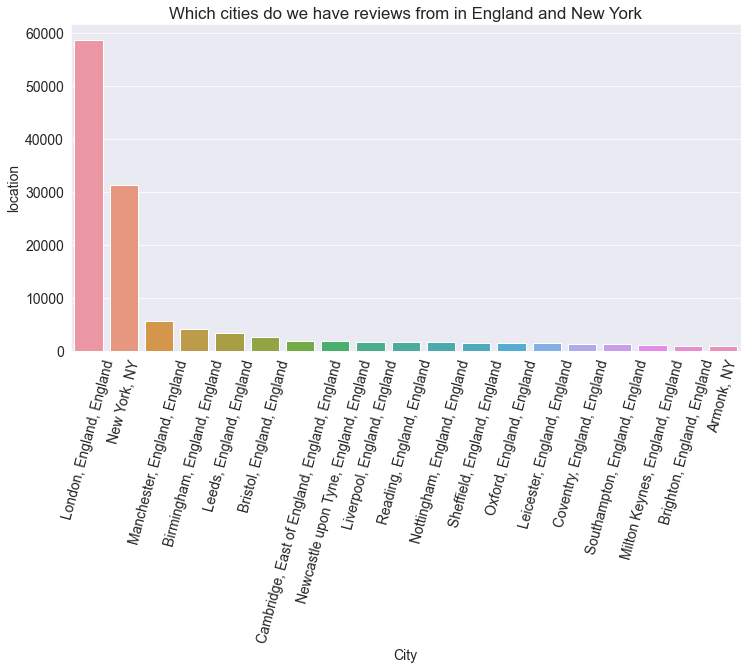

In [42]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.xlabel('City')
plt.ylabel('Reviews')
plt.title('Which cities do we have reviews from in England and New York')

sns.barplot(x=geo.index, y= geo);

In [43]:
firm= Eng_NY['firm'].value_counts().head(25)
firm

Tesco                   5519
IBM                     4680
McDonald-s              4630
J-P-Morgan              4515
PwC                     4015
Deloitte                3972
EY                      3959
Barclays                3538
Citi                    3324
J-Sainsbury             3091
NHS                     2926
KPMG                    2775
Goldman-Sachs           2475
Morgan-Stanley          2435
HSBC-Holdings           2413
ASDA                    2380
Marks-and-Spencer       2238
Bloomberg-L-P           2111
Accenture               2082
Primark                 1992
American-Express        1947
Waitrose                1930
Boots                   1673
Lloyds-Banking-Group    1672
Deutsche-Bank           1663
Name: firm, dtype: int64

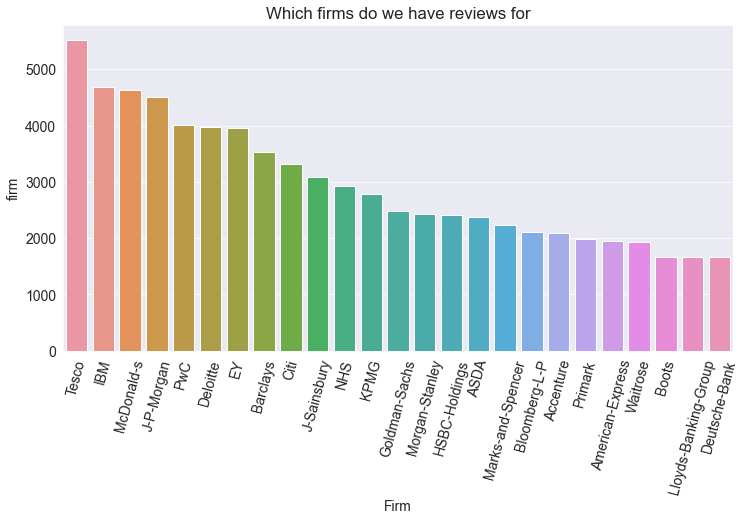

In [44]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.xlabel('Firm')
plt.ylabel('Reviews')
plt.title('Which firms do we have reviews for')

sns.barplot(x=firm.index, y= firm);

In [45]:
job= Eng_NY['job_title'].value_counts().head(25)
job

 Anonymous Employee                 11466
                                     4449
 Manager                             3350
 Sales Assistant                     3084
 Customer Assistant                  2899
 Analyst                             2240
 Vice President                      2100
 Associate                           1980
 Consultant                          1700
 Director                            1664
 Sales Associate                     1527
 Senior Manager                      1514
 Project Manager                     1469
 Software Engineer                   1442
 Senior Consultant                   1339
 Crew Member                         1261
 Student                             1202
 Customer Service Representative     1194
 Senior Associate                    1163
 Customer Service                    1114
 Sales Advisor                       1070
 Business Analyst                    1033
 Customer Service Assistant           923
 Retail Assistant                 

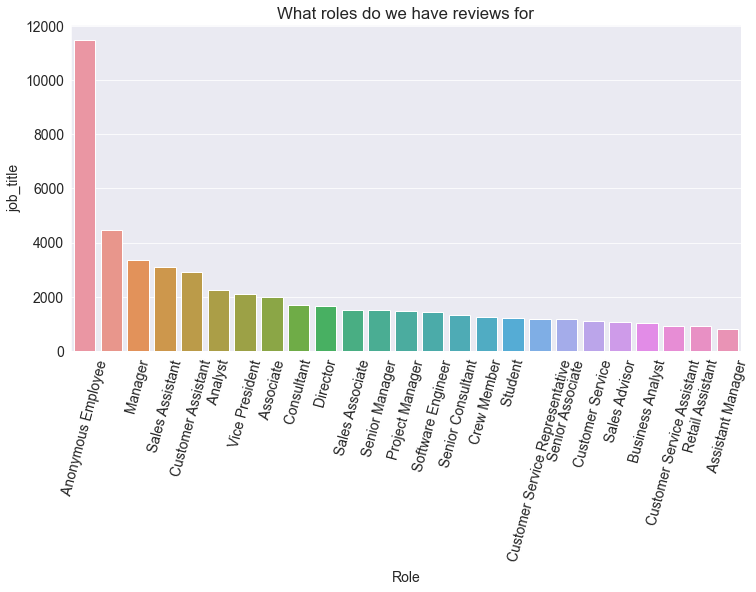

In [46]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.xlabel('Role')
plt.ylabel('Reviews')
plt.title('What roles do we have reviews for')

sns.barplot(x=job.index, y= job);

In [47]:
#Firms with ratings above 3 in NY
G_NY =NY[NY['overall_rating'] >= 4] 

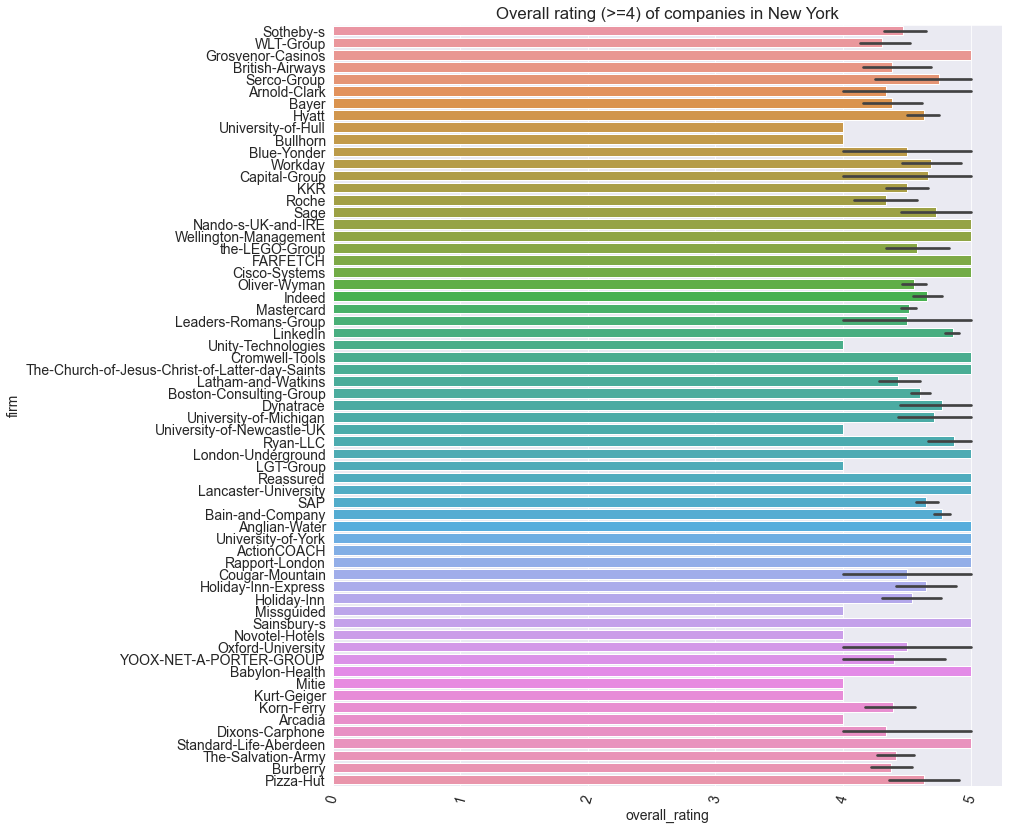

In [48]:
plt.figure(figsize=(12, 14))
plt.xticks(rotation=75)
plt.title('Overall rating (>=4) of companies in New York')
sns.barplot('overall_rating', 'firm',data=G_NY.head(1500));


In [49]:
#Firms with ratings below 4 in  NY
B_NY =NY[NY['overall_rating'] <= 3] 

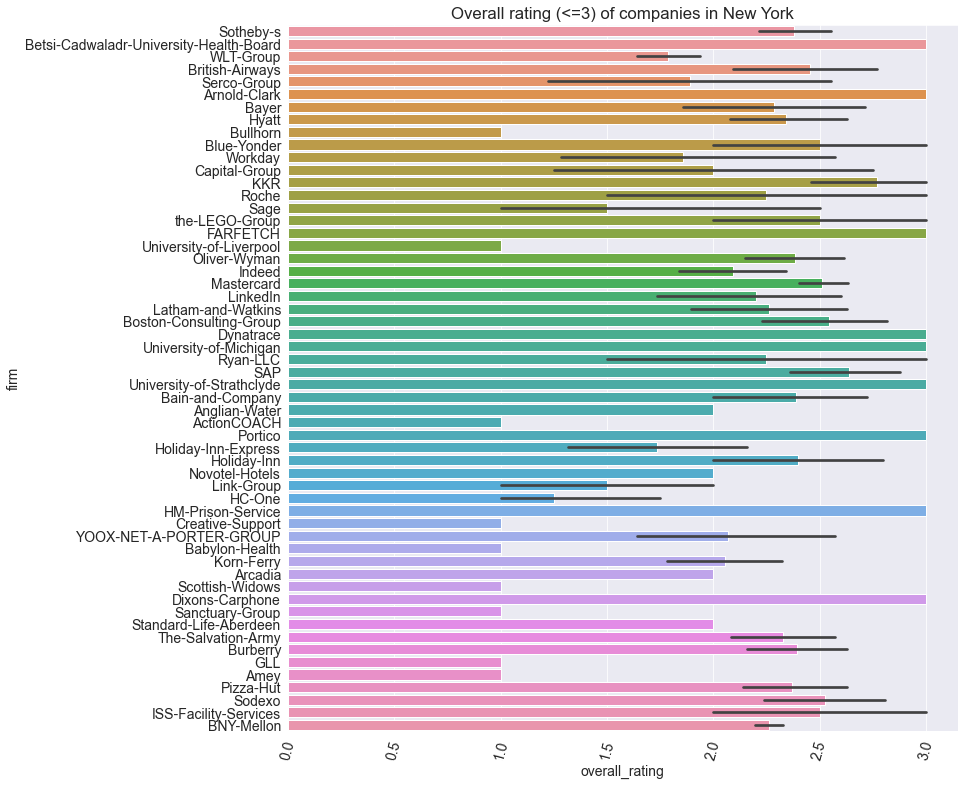

In [50]:
plt.figure(figsize=(12, 13))
plt.xticks(rotation=75)
plt.title('Overall rating (<=3) of companies in New York')
sns.barplot('overall_rating', 'firm',data=B_NY.head(1500));

In [51]:
#Firms with ratings above 3 in England
G_Eng =England[England['overall_rating'] >= 4] 

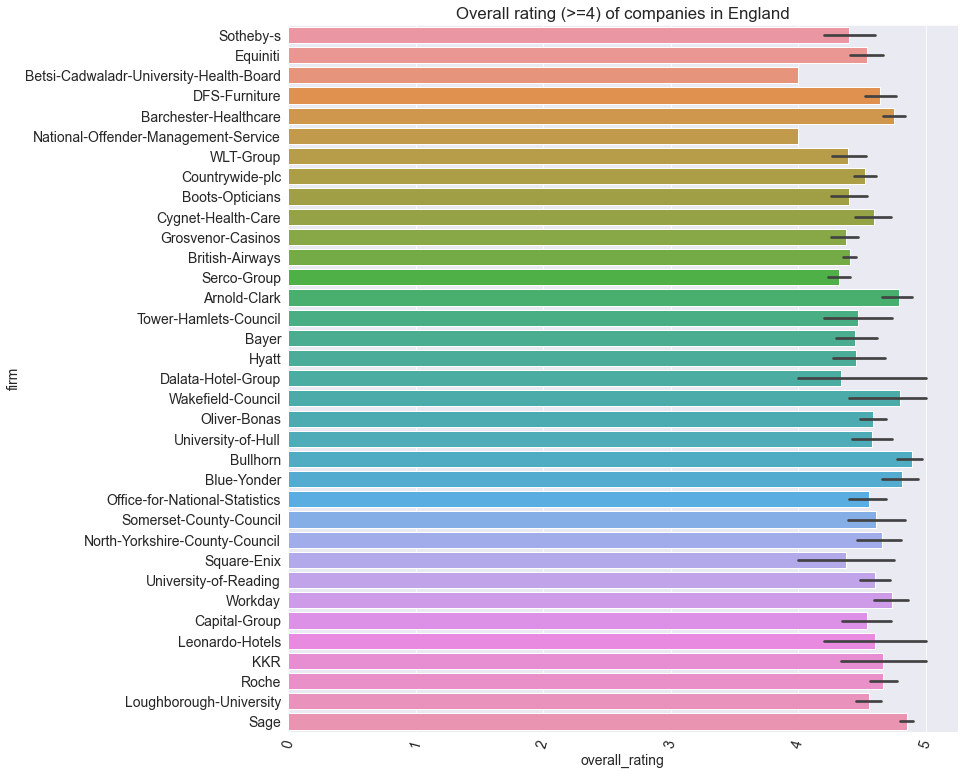

In [52]:
plt.figure(figsize=(12, 13))
plt.xticks(rotation=75)
plt.title('Overall rating (>=4) of companies in England')
sns.barplot('overall_rating', 'firm',data=G_Eng.head(2000));

In [53]:
#Firms with ratings below 4 in England
B_Eng =England[England['overall_rating'] <= 3] 

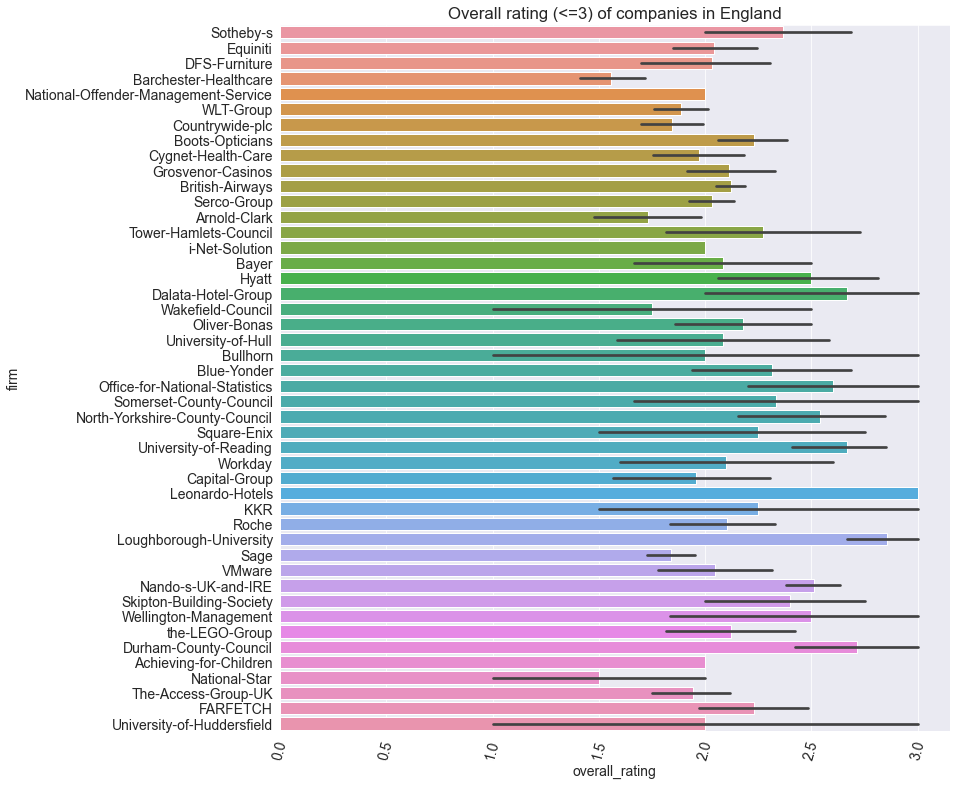

In [54]:
plt.figure(figsize=(12, 13))
plt.xticks(rotation=75)
plt.title('Overall rating (<=3) of companies in England')
sns.barplot('overall_rating', 'firm',data=B_Eng.head(2500));

### Let's review the work-life balance, cultural values, diversity inclusion, career opportunity and company benefits of about 6 companies and 4 roles

In [55]:
loct = ['McKinsey-and-Company', 'Microsoft','NHS','IBM', 'KPMG','Bloomberg-L-P']
six_firms= Eng_NY[Eng_NY['firm'].isin(loct)]
six_firms


,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
421914,IBM,2021-06-04,Associate Partner,"Current Employee, more than 10 years","London, England, England",4,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Great company to work with,"standards , methods, supports, opportunities, ...","inflexible, huge, slow, less agile"
421920,IBM,2021-06-04,Test Manager,Current Employee,"Birmingham, England, England",4,2.0,4.0,3.0,5.0,5.0,3.0,v,v,v,Investor in People and lots of innovative tech...,Forward looking company that continuously inve...,"As with all services companys, the hours of wo..."
421924,IBM,2021-06-04,Consultnant,Current Employee,"London, England, England",5,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Amazing Company,"Great culture, learning, opportunities, exciti...","Large organization, processes can be quite com..."
421958,IBM,2021-06-03,Senior Manager,Current Employee,"London, England, England",1,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Nasty,"Nothing culture, bully people endlessly.","Nasty company, bully culture endlessly"
421966,IBM,2021-06-03,Senior Manager,Current Employee,"London, England, England",1,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Nasty,"Nothing culture, bully people endlessly.","Nasty company, bully culture endlessly"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836245,NHS,2019-07-22,Pharmacist,"Current Employee, more than 5 years","New York, NY",4,3.0,5.0,NaN,5.0,5.0,5.0,o,o,o,Public Health Service,Driven by passionate work force,tax payer funded therefore low capacity for st...
836248,NHS,2019-07-22,Salaried GP,"Current Employee, more than 1 year","New York, NY",3,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Varied and interesting area to work in,Well funded borough with excellent development...,Salaried jobs can be scarce.
836674,NHS,2018-12-04,Biomedical Scientist,"Current Employee, less than 1 year","Southampton, NY",5,5.0,5.0,NaN,3.0,3.0,5.0,v,r,v,NHS Biomedical Scientist,Breaks and long lunch is good.,No bonuses what so ever
836800,NHS,2018-09-06,Administrative,"Former Employee, less than 1 year","Armonk, NY",3,3.0,2.0,NaN,2.0,2.0,2.0,x,v,x,Good cause but blame culture still exists,Great professional medical staff lovely to wor...,Micro management and bullying by departmental ...


Remember that these 6 firms might have branch in both New York and England.

>For branches in New York

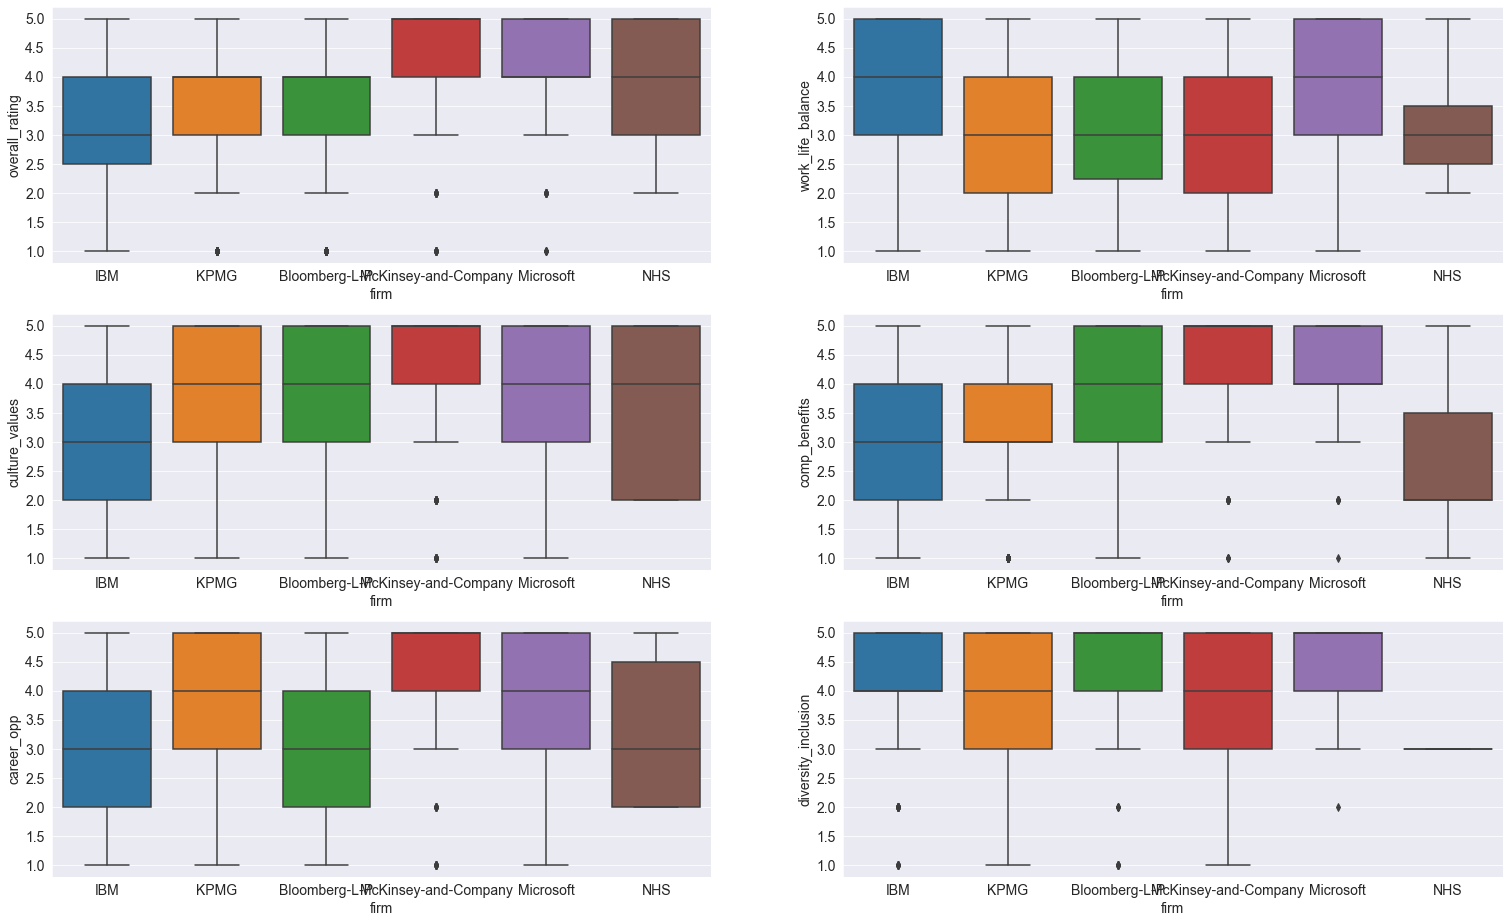

In [56]:
fig, axes = plt.subplots(3, 2, figsize=(26, 16))

#create boxplot in each subplot
sns.boxplot('firm', 'overall_rating',data=six_firms[six_firms['location'].str.contains(', NY', na=False)], ax=axes[0,0]);
sns.boxplot('firm', 'work_life_balance',data=six_firms[six_firms['location'].str.contains(', NY', na=False)], ax=axes[0,1]);
sns.boxplot('firm', 'culture_values',data=six_firms[six_firms['location'].str.contains(', NY', na=False)], ax=axes[1,0]);
sns.boxplot('firm', 'comp_benefits',data=six_firms[six_firms['location'].str.contains(', NY', na=False)], ax=axes[1,1]);
sns.boxplot('firm', 'career_opp',data=six_firms[six_firms['location'].str.contains(', NY', na=False)], ax=axes[2,0]);
sns.boxplot('firm', 'diversity_inclusion',data=six_firms[six_firms['location'].str.contains(', NY', na=False)], ax=axes[2,1]);

>For branches in England

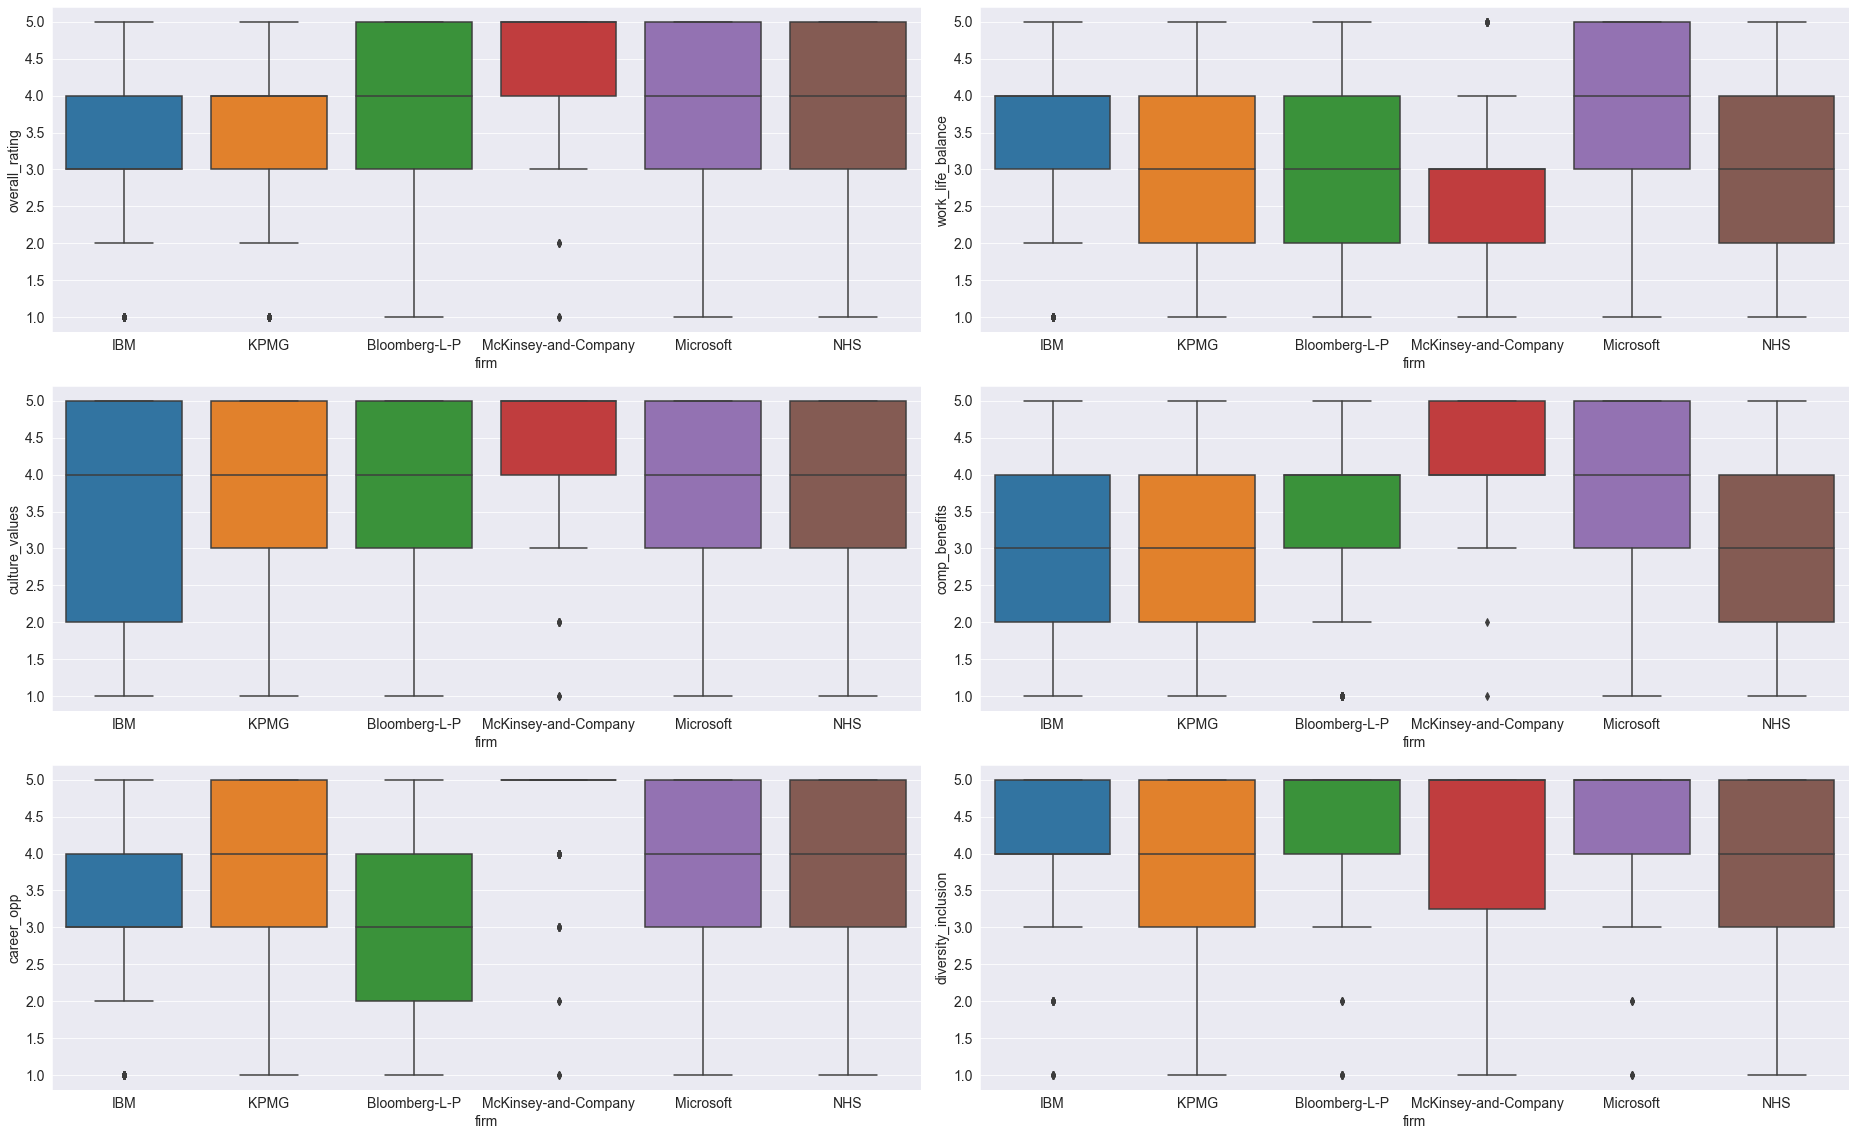

In [109]:
fig, axes = plt.subplots(3, 2, figsize=(26, 16))

#create boxplot in each subplot
sns.boxplot('firm', 'overall_rating',data=six_firms[six_firms['location'].str.contains('England', na=False)], ax=axes[0,0]);
sns.boxplot('firm', 'work_life_balance',data=six_firms[six_firms['location'].str.contains('England', na=False)], ax=axes[0,1]);
sns.boxplot('firm', 'culture_values',data=six_firms[six_firms['location'].str.contains('England', na=False)], ax=axes[1,0]);
sns.boxplot('firm', 'comp_benefits',data=six_firms[six_firms['location'].str.contains('England', na=False)], ax=axes[1,1]);
sns.boxplot('firm', 'career_opp',data=six_firms[six_firms['location'].str.contains('England', na=False)], ax=axes[2,0]);
sns.boxplot('firm', 'diversity_inclusion',data=six_firms[six_firms['location'].str.contains('England', na=False)], ax=axes[2,1]);

>For both locations

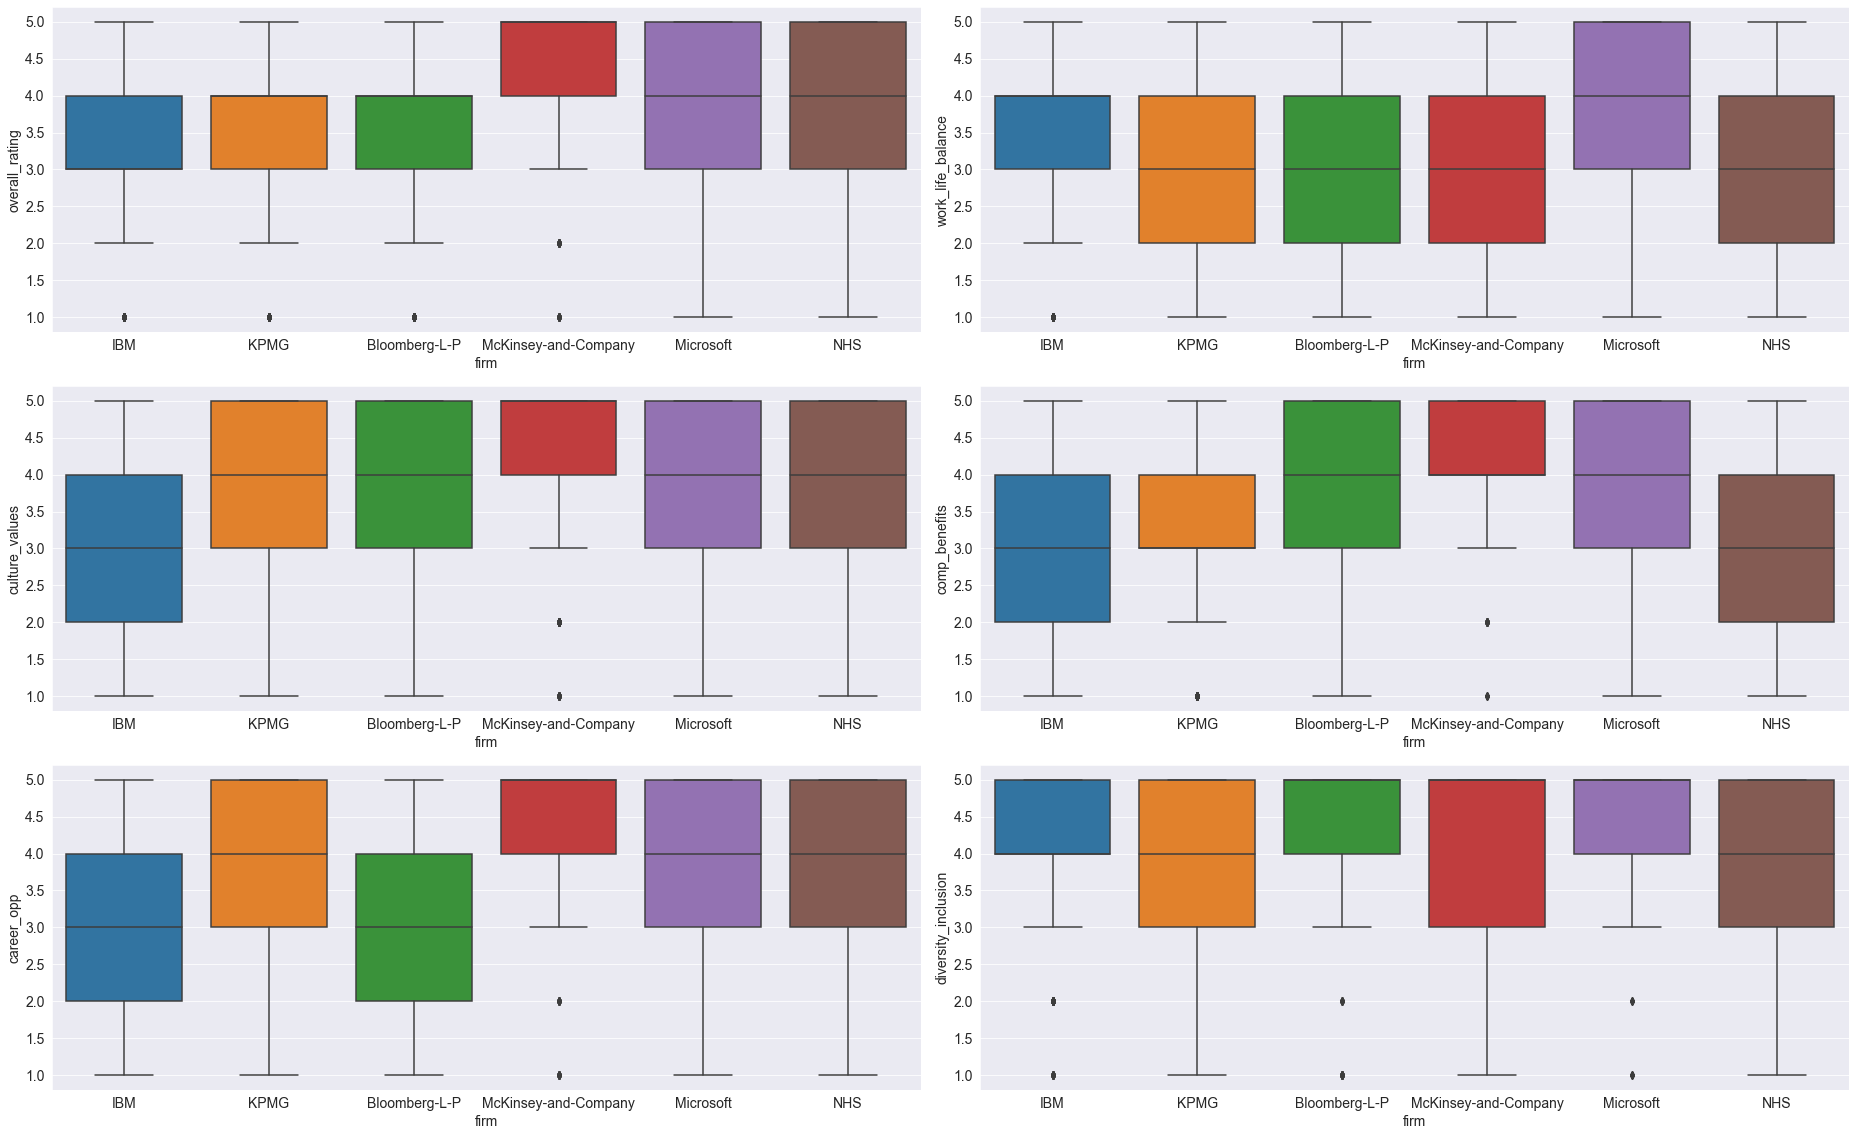

In [110]:

fig, axes = plt.subplots(3, 2, figsize=(26, 16))

#create boxplot in each subplot
sns.boxplot('firm', 'overall_rating',data=six_firms, ax=axes[0,0]);
sns.boxplot('firm', 'work_life_balance',data=six_firms, ax=axes[0,1]);
sns.boxplot('firm', 'culture_values',data=six_firms, ax=axes[1,0]);
sns.boxplot('firm', 'comp_benefits',data=six_firms, ax=axes[1,1]);
sns.boxplot('firm', 'career_opp',data=six_firms, ax=axes[2,0]);
sns.boxplot('firm', 'diversity_inclusion',data=six_firms, ax=axes[2,1]);

>For 4 job titles in the six firms(IBM, KPMG, Bloomberg-L-P, Mckinsey and Company, Microsoft, NHS)

In [111]:
#Create a new column 'role' that replicate 'job title'
six_firms['role']=six_firms['job_title']
six_firms

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,role
421914,IBM,2021-06-04,Associate Partner,"Current Employee, more than 10 years","London, England, England",4,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Great company to work with,"standards , methods, supports, opportunities, ...","inflexible, huge, slow, less agile",Associate Partner
421920,IBM,2021-06-04,Test Manager,Current Employee,"Birmingham, England, England",4,2.0,4.0,3.0,5.0,5.0,3.0,v,v,v,Investor in People and lots of innovative tech...,Forward looking company that continuously inve...,"As with all services companys, the hours of wo...",Test Manager
421924,IBM,2021-06-04,Consultnant,Current Employee,"London, England, England",5,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Amazing Company,"Great culture, learning, opportunities, exciti...","Large organization, processes can be quite com...",Consultnant
421958,IBM,2021-06-03,Senior Manager,Current Employee,"London, England, England",1,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Nasty,"Nothing culture, bully people endlessly.","Nasty company, bully culture endlessly",Senior Manager
421966,IBM,2021-06-03,Senior Manager,Current Employee,"London, England, England",1,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Nasty,"Nothing culture, bully people endlessly.","Nasty company, bully culture endlessly",Senior Manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836245,NHS,2019-07-22,Pharmacist,"Current Employee, more than 5 years","New York, NY",4,3.0,5.0,NaN,5.0,5.0,5.0,o,o,o,Public Health Service,Driven by passionate work force,tax payer funded therefore low capacity for st...,Pharmacist
836248,NHS,2019-07-22,Salaried GP,"Current Employee, more than 1 year","New York, NY",3,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Varied and interesting area to work in,Well funded borough with excellent development...,Salaried jobs can be scarce.,Salaried GP
836674,NHS,2018-12-04,Biomedical Scientist,"Current Employee, less than 1 year","Southampton, NY",5,5.0,5.0,NaN,3.0,3.0,5.0,v,r,v,NHS Biomedical Scientist,Breaks and long lunch is good.,No bonuses what so ever,Biomedical Scientist
836800,NHS,2018-09-06,Administrative,"Former Employee, less than 1 year","Armonk, NY",3,3.0,2.0,NaN,2.0,2.0,2.0,x,v,x,Good cause but blame culture still exists,Great professional medical staff lovely to wor...,Micro management and bullying by departmental ...,Administrative


#### Replacing all job title with identical string with a string

In [112]:
#Replacing all job title that contains analyst string with analyst
six_firms['role'] = six_firms['role'].replace([' Analyst', ' Business Analyst', ' Financial Analyst',
       ' Problem Analyst', ' Data Analyst', ' Programmer Analyst',
       ' Cyber Security Analyst', ' Data Analyst/IT Consultant',
       ' IT Analyst', ' Test Analyst', ' Operations Analyst',
       ' Cognos Analyst', ' Helpdesk Analyst', ' Project Analyst',
       ' Business Process Analyst', ' Finance Analyst',
       ' Business Analyst Intern', ' IT Support Analyst',
       ' Agile Business Analyst', ' Systems Analyst',
       ' Business Analyst (Placement)', ' Valuation Analyst',
       ' Restructuring Analyst', ' IT Audit Analyst',
       ' Technology Consulting Analyst', ' Client Analyst',
       ' Transfer Pricing Analyst', ' Business Intelligence Analyst',
       ' Management Consulting Analyst', ' Senior Analyst',
       ' M&A Analyst', ' Cyber Analyst', ' Lead Product Analyst',
       ' Tax Analyst', ' Summer Analyst', ' Technology Analyst',
       ' IRM Analyst', ' Analyst (Third Year)', ' Consulting Analyst',
       ' Pricing Analyst', ' Analyst (E2)', ' Research Analyst',
       ' Mergers & Acquisitions, Analyst', ' Travel Analyst',
       ' Strategy Analyst', ' Actuarial Analyst',
       ' Senior Financial Analyst', ' Graduate Analyst',
       ' Deal Advisory Analyst', ' Analyst/Graduate Trainee',
       ' QA Analyst', ' Advisory Summer Analyst', ' Busineess Analyst',
       ' Senior Support Analyst', ' AML Analyst',
       ' Management Consultant, Analyst', ' Transaction Services Analyst',
       ' Global Data Analyst', ' Senior Quant Analyst',
       ' Fixed Income Analyst', ' Trade Desk Analyst',
       ' Sales and Financial Analyst', ' Financial Data Analyst',
       ' KYC Analyst', ' Quantitative Analyst',
       ' Equity Research Data Analyst', ' Product Analyst',
       ' Modeling Analyst', ' Senior Business Analyst',
       ' Mutual Fund Analyst', ' Equity Fundamentals Analyst',
       ' Equity Analyst', ' Equity Research Analyst',
       ' Data and Energy Analyst', ' Policy Analyst',
       ' IT Service Desk Analyst', ' Data Research Analyst',
       ' Equity Data Analyst', ' Senior Data Analyst', ' Index Analyst',
       ' Syndicated Loans Analyst', ' Accounts Analyst',
       ' Knowledge Analyst', ' Summer Business Analyst',
       ' Senior Research Analyst', ' Business Analyst II',
       ' Business Strategy Analyst', ' Global Consumer Insights Analyst',
       ' Systems Monitor/Analyst and Communications Supervisor',
       ' Service Desk Analyst', ' Senior Programmer Analyst',
       ' Workforce Analyst', ' Supply Chain Analyst',
       ' Technical Analyst', ' Information Analyst',
       ' IT Help Desk Analyst', ' Principal Analyst',
       ' Business and Performance Analyst', ' Junior KYC Analyst',
       ' Junior Information Analyst', ' Senior Digital Analyst',
       ' Data Quality Analyst', ' Data Governance Analyst',
       ' Clinical IT Analyst', ' Trainee Finance Analyst',
       ' Senior Clinical Analyst', ' Senior IT Analyst',
       ' Clinical Applications Analyst', ' Healthcare Analyst',
       ' Income Analyst', ' PMO Analyst',
       ' Data and Voice Network Analyst', ' Clinical Systems Analyst',
       ' Performance Analyst', ' ICT Analyst',
       ' Information Systems Analyst', ' FIN Analyst',
       ' Treasury Analyst', ' Performance Marketing Analyst',
       ' Market Development and Insights Analyst',
       ' Senior Computer Systems Analyst', ' Finance Analyst Co',
       ' Sales Operations Analyst', ' Information Security Analyst',
       ' Advisory Systems Analyst', ' Financial Analyst Co',
       ' Senior Operations Analyst', ' Software Analyst',
       ' Security Analyst', ' Security Intelligence Analyst',
       ' Senior QA Analyst',
       ' Project Management Analyst/Business Analyst',
       ' Systems Analyst for IBM', ' Team Leader and Business Analyst',
       ' Accounting Analyst', ' Analyst Functional Team',
       ' CRM Operational Analyst', ' Senior Business Controls Analyst',
       ' Logistics Analyst', ' Human Resources Analyst',
       ' Senior HRIS Analyst', ' Computer Systems Analyst',
       ' Career Financial Analyst', ' Technical Operations Analyst',
       ' Market Research Analyst', ' Professional Financial Analyst',
       ' Insurance Solutions Research Analyst Intern',
       ' Senior Systems Analyst', ' Segment Analyst, Market Intelligence',
       ' Risk Analyst', ' Quality Analyst', ' Forensic Analyst',
       ' Financial Product Analyst & Sales', ' Senior Portfolio Analyst',
       ' Structured Products Analyst', ' Financial Products Analyst',
       ' Billing Analyst', ' Senior Billing Analyst',
       ' Financial Product Analyst', ' Exchange Analyst',
       ' Legal Data Analyst', ' Associate Analyst', ' Senior Analyst ',
       ' Compliance Analyst', ' Bloomberg Intelligence Equity Analyst',
       ' Desktop Support Analyst', ' Bloomberg Intelligence Analyst',
       ' Quantitative Research Analyst', ' Business Data Analyst',
       ' Legal Analyst', ' Media Analyst',
       ' SAP Supply Chain Project Analyst', ' Network Analyst',
       ' Senior Quantitative Analyst', ' Business Analyst Risk',
       ' Digital Analyst', ' Present Business Analyst',
       ' IT Business Analyst', ' Software Enginerring Analyst',
       ' Assistant Analyst'],'Analyst')


In [113]:
#Replacing all job title that contains engineer string with engineer
six_firms['role'] = six_firms['role'].replace([' Software Test Engineer', ' Senior Systems Engineer',
       ' Associate Engineer', ' Software Engineer',
       ' Software Support Engineer', ' Technical Support Engineer',
       ' Data Engineer', ' Vmware Engineer',
       ' IT Service Desk Engineer (Levels I, II)', ' Systems Engineer',
       ' Site Reliability Engineer', ' IT Engineer', ' Cloud Engineer',
       ' Field Service Engineer', ' Graduate Software Engineer',
       ' Machine Learning Engineer', ' Devops Engineer',
       ' L3 Software Engineer', ' Data & AI SOlution Engineer',
       ' Senior Software Engineer', ' Senior Engineer',
       ' IT Systems Engineer', ' Software Engineer Intern',
       ' Linux Support Engineer', ' Automation Engineer',
       ' IT Field Support Engineer', ' QA Engineer',
       ' Senior Data Engineer', ' Design Engineer',
       ' Senior DevOps Engineer', ' Senior Financial Engineer',
       ' Middleware Engineer', ' Distinguished Engineer',
       ' Server Build Engineer', ' Technical Sales Engineer',
       ' Storage Engineer', ' Software Development Engineer',
       ' Advisory Software Engineer (Band 8)',
       ' Senior Engineer/London Territory Team Leader',
       ' Product Engineer', ' Pre Sales Engineer', ' Quality Engineer',
       ' Engineer', ' Digital Design Engineer',
       '  Desktop Support Engineer ', ' Staff Software Engineer',
       ' Junior Data Engineer', ' Apprentice DevOps Engineer',
       ' Dev Ops Engineer', ' Senior Big Data Engineer',
       ' Associate Software Engineer', ' Lead DevOps Engineer',
       ' Senior R&D Engineer', ' SRE/DevOps Engineer',
       ' Software Engineer Manager', ' Senior Engineering Manager',
       ' Software Engineering Team Lead', ' Consulting Hardware Engineer',
       ' Engineering Manager', ' Software Engineer(Internship)',
       ' Engineering', ' Full Stack Software Engineer',
       ' IT Technical Engineer', ' Principal Software Engineer',
       ' Support Engineer', ' Escalation Engineer',
       ' Senior Customer Engineer', ' Service Engineer',
       ' Principal Security Engineer',
       ' Software Development Engineer (SDE)', ' Software Engineer II',
       ' Fresh Graduate Software Engineer', ' Junior Software Engineer',
       ' Engineering Development Programmer', ' Premier Field Engineer',
       ' Research Engineer', ' Biometric Engineer',
       ' Software Development Engineer II',
       ' Senior Software Development Engineer',
       ' Senior Software Development Engineer In Test (SDET)',
       ' Software Developer Engineer', ' Director, Engineering',
       ' Software Development Engineer In Test (SDET) II',
       ' Engineering Lead', ' Principal Software Development Engineer',
       ' Software Development Engineer In Test (SDET)',
       ' Software Development Engineer (SDE) II',
       ' Research Software Development Engineer II',
       ' Intern Software Development Engineer',
       ' Second Line Support Engineer', ' Radiotherapy Engineer',
       ' Network Engineer', ' Mechanical Engineer',
       ' Mainantance Engineer', ' Continuous Improvement Engineer',
       ' Medical Engineer', ' EUT Engineer', ' Desktop Support Engineer',
       ' Junior Operations Engineer', ' Senior Infrastructure Engineer',
       ' Business Intelligence Engineer', ' Soft Ware Engineer',
       ' Optical Engineer', ' Computer Systems Engineer',
       ' Network Security Engineer', ' Staff Engineer',
       ' Sales Engineering Manager', ' Embedded Firmware Engineer',
       ' Cost Engineer', ' Software Engineer Apprentice',
       ' Advisory Software Engineer', ' Graduate Engineer',
       ' Applications Support Engineer', ' Advisory Hardware Engineer',
       ' Hardware Development Engineer', ' Software QA Engineer',
       ' Test Engineer', ' Device Engineer', ' Sales Engineer',
       ' Engineering Director', ' Principal Systems Engineer',
       ' Development Engineer',
       ' Architect/Linux Systems Engineer/Systems Administrator',
       ' Solution Engineer and Architect', ' Software Engineer Senior',
       ' Hardware Engineer', ' Advisory Engineer',
       ' Deep Learning Software Engineer', ' Senior Engineer/Scientist',
       ' Senior Sales Engineer', ' Lead Software Engineer',
       ' Vice President Engineering', ' Electronics Engineer',
       ' REMOTE Technical Support Engineer',
       ' Associate Systems Engineer', ' Sales Engineer ',
       ' Band9 Senior Engineer', ' Component Engineer',
       ' Cognitive Software Engineer',
       ' Staff Software Engineer (Band 7 Software Developer)',
       ' Staff Engineer/Scientist',
       ' Unit Process Engineering Professional',
       ' Software Engineer (Band 6)',
       ' Development Characterization Engineer',
       ' Procurement Engineering', ' Systems/Cloud Engineer',
       ' Process Engineer', ' Senior Development Engineer',
       ' Modeling Engineer', ' Cyber Security Engineer',
       ' ZSystems Software Engineer', ' Senior Mechanical Engineer',
       ' Engineering Technician', ' Unit Process Development Engineer',
       ' Patent Engineer Professional',
       ' Senior Process Development Engineer',
       ' Digital Design Engineer, Advisory',
       ' Project Engineering Manager', ' Verification Engineer',
       ' Equipment Engineer', ' Senior Hardware Design Engineer',
       ' Engineer In Research and Development', ' H/W Engineer',
       ' Staff Hardware Engineer', ' Manufacturing Engineer',
       ' Senior Network Engineer', ' Software Engineer Team Lead',
       ' Data Center Engineer', ' SRE Engineer', ' Engineer Manager',
       ' Network Operations Engineer', ' Systems Reliability Engineer',
       ' Senior Front End Engineer', ' Software Engineer (internship)',
       ' Engineering Recruiter', ' Financial Software Engineer',
       ' Server Storage Engineer', ' Software Engineering Intern',
       ' Financial Applications Engineer', ' C++ Software Engineer',
       ' Software Quality Assurance Engineer',
       ' User Experience Software Engineer', ' Financial Engineer',
       ' Dat Center Engineer', ' Digital Expert/Big Data Engineer',
       ' Eectrical Engineer', ' Premier Support Engineer',
       ' Senior Premier Field Engineer'],'Engineer')


In [114]:
#Replacing all job title that contains Software Developer string with Software Developer
six_firms['role'] = six_firms['role'].replace([' Software Developer', ' Senior Software Developer',
       ' Graduate Software Developer', ' Apprentice Software Developer',
       ' Financial Software Developer', ' Junior Software Developer',
       ' Financial Software Developer Intern',
       ' Software Developer Engineer', ' Entry Level Software Developer',
       ' Staff Software Engineer (Band 7 Software Developer)',
       ' Senior Financial Software Developer',
       ' Financial Software Developer Consultant'],'Software Developer')


In [115]:
#Replacing all job title that contains Doctor string with medical practitioner
six_firms['role'] = six_firms['role'].replace([' Doctor', ' Public Health Doctor', ' Foundation Doctor I',
       ' Foundation Doctor', ' Medical Doctor', ' NHS Junior Doctor',
       ' FY1 Doctor', ' GP Doctor', ' Foundation Year Doctor',
       ' F2 Doctor', ' NHS FY2 Doctor', ' NHS Doctor', ' Doctor Fy2',
       ' Junior Doctor (FY1)', ' Junior Doctor',
       ' Academic Foundation Doctor', ' ST6 Doctor',
       ' Foundation Doctor Year I', ' Foundation Year II Doctor',
       ' Foundation Doctor II', ' Post Doctoral Scientist', ' FY2 Doctor',
       ' Júnior Doctor', ' F1 Doctor', ' Student Doctor',
       ' Consultant Doctor', ' Anaesthetist (Specialty Doctor)',
       ' Hospital Doctor'],'Medical practioner')


In [116]:
#Replacing all job title that contains Nurse string with medical practitioner
six_firms['role'] = six_firms['role'].replace([' Registered Nurse', ' RN Staff Nurse',
       ' Clinical Nurse Specialist', ' Practice Nurse', ' Nurse',
       ' Staff Nurse (RN)', ' Trainee Dental Nurse', ' Community Nurse',
       ' RMN Mental Health Nurse', ' Registered Nurse, BSN',
       ' Advanced Nurse Practitioner', ' Registered Practical Nurse',
       ' Registered Senior Staff Nurse', ' Nurse Associate',
       ' Licensed Practical Nurse', ' Assistant Nurse',
       ' Nurse Practitioner', ' RGN Staff Nurse', ' Oncology Nurse',
       ' RMN Staff Nurse', ' Auxiliary Nurse', ' Band 6 Nurse',
       ' Dementia Nurse Specialist', ' Community Mental Health Nurse',
       ' NHS Staff Nurse', ' Band 7 Nurse', ' Senior Staff Nurse',
       ' NHS Nurse', ' Student Nurse', ' Clinical Research Nurse',
       ' Picu Nurse', ' Charge Nurse', ' Scrub Nurse',
       ' Clinical Nurse Specialist (CNS)', ' Itu Nurse',
       ' Register Nurse', ' Staff Nurse', ' Stroke Nurse',
       ' Senior Nurse Manager', ' Specialist Nurse',
       ' Bank Nursery Assistant', ' Senior Charge Nurse',
       ' Registered General Nurse', ' Registered Psychiatric Nurse',
       ' Mental Health Nurse', ' Retired Nurse Manager, Then Per Diem RN',
       ' Triage Nurse/Clinical Advisor/Health and Well',
       ' Public Health Nurse', ' Community Staff Nurse',
       ' Registered Mental Health Nurse', ' Band IV Nurse',
       ' TAVI Clinical Nurse Specialist', ' Specialist Children Nurse',
       ' Anti Coagulation Specialist Nurses',
       ' Vascular Access Specialist Nurse Practitioner',
       ' Community Learning Disability Nurse', ' Stroke Assessment Nurse',
       ' Healthcare Nurse', ' Staff Nurse Rmn',
       ' Community Psychiatric Nurse', ' Nursery Practitioner',
       ' Mental Health Nurse (Senior Role)', ' Nurse Team Leader',
       ' Nurse Assistant', ' Theatre Nurse', ' NICU Nurse Band V'],'Medical practioner')


In [117]:
roles = ['Analyst', 'Engineer','Software Developer','Medical practioner']
four_roles= six_firms[six_firms['role'].isin(roles)]
four_roles

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,role
422253,IBM,2021-05-26,Software Test Engineer,"Current Employee, more than 5 years","London, England, England",4,4.0,4.0,4.0,4.0,4.0,4.0,o,o,o,Good company,"Good work culture, work-life balance",No cons I can say,Engineer
422496,IBM,2021-05-20,Senior Systems Engineer,Current Employee,"London, England, England",5,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Dream Job,Living my best life ever,No cons to mention at this time,Engineer
422595,IBM,2021-05-18,Associate Engineer,Current Employee,"London, England, England",5,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Systems administrator,Good level for managing the operating systems,Harder schedule in the job,Engineer
422671,IBM,2021-05-17,Software Engineer,Current Employee,"Southampton, England, England",3,5.0,4.0,5.0,2.0,1.0,2.0,v,v,r,Good for experience,Comfortable workspace and able to learn.,Hard to get promoted or get a salary rise.,Engineer
422815,IBM,2021-05-13,Analyst,"Former Employee, more than 1 year","London, England, England",4,4.0,4.0,4.0,4.0,4.0,4.0,v,r,r,for contributing to the community. Your opinio...,hank you for contributing to the community. Yo...,None really really none none,Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782128,Microsoft,2008-06-24,Business Analyst,Former Employee,"New York, NY",4,4.0,NaN,NaN,4.0,4.0,4.0,v,v,o,A fading giant which is beginning to face the ...,They have a good reputation. They are still th...,There are limited opportunities to explore a w...,Analyst
782337,Microsoft,2008-06-11,Senior Business Analyst,Former Employee,"New York, NY",4,5.0,NaN,NaN,5.0,4.0,5.0,v,r,o,Awesome opportunities but little direction,"Great benefits, lots of opportunities for grow...","Lots of bureaucracy, lots of confusion in busi...",Analyst
782411,Microsoft,2008-05-01,Software Development Engineer In Test (SDET),Current Employee,"Hauppauge, NY",5,4.0,NaN,NaN,5.0,4.0,5.0,v,v,o,Ballmer once again exhibits 'Neo Matrix Style ...,Microsoft is a great place to work because it ...,"Microsoft attracts a large amount of very, ver...",Engineer
834455,NHS,2020-11-29,Software Engineer,Current Employee,"New York, NY",5,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Excellent company,good work life balance and employees,no cons for the most part,Engineer


>Accessing ratings for four job indicators 

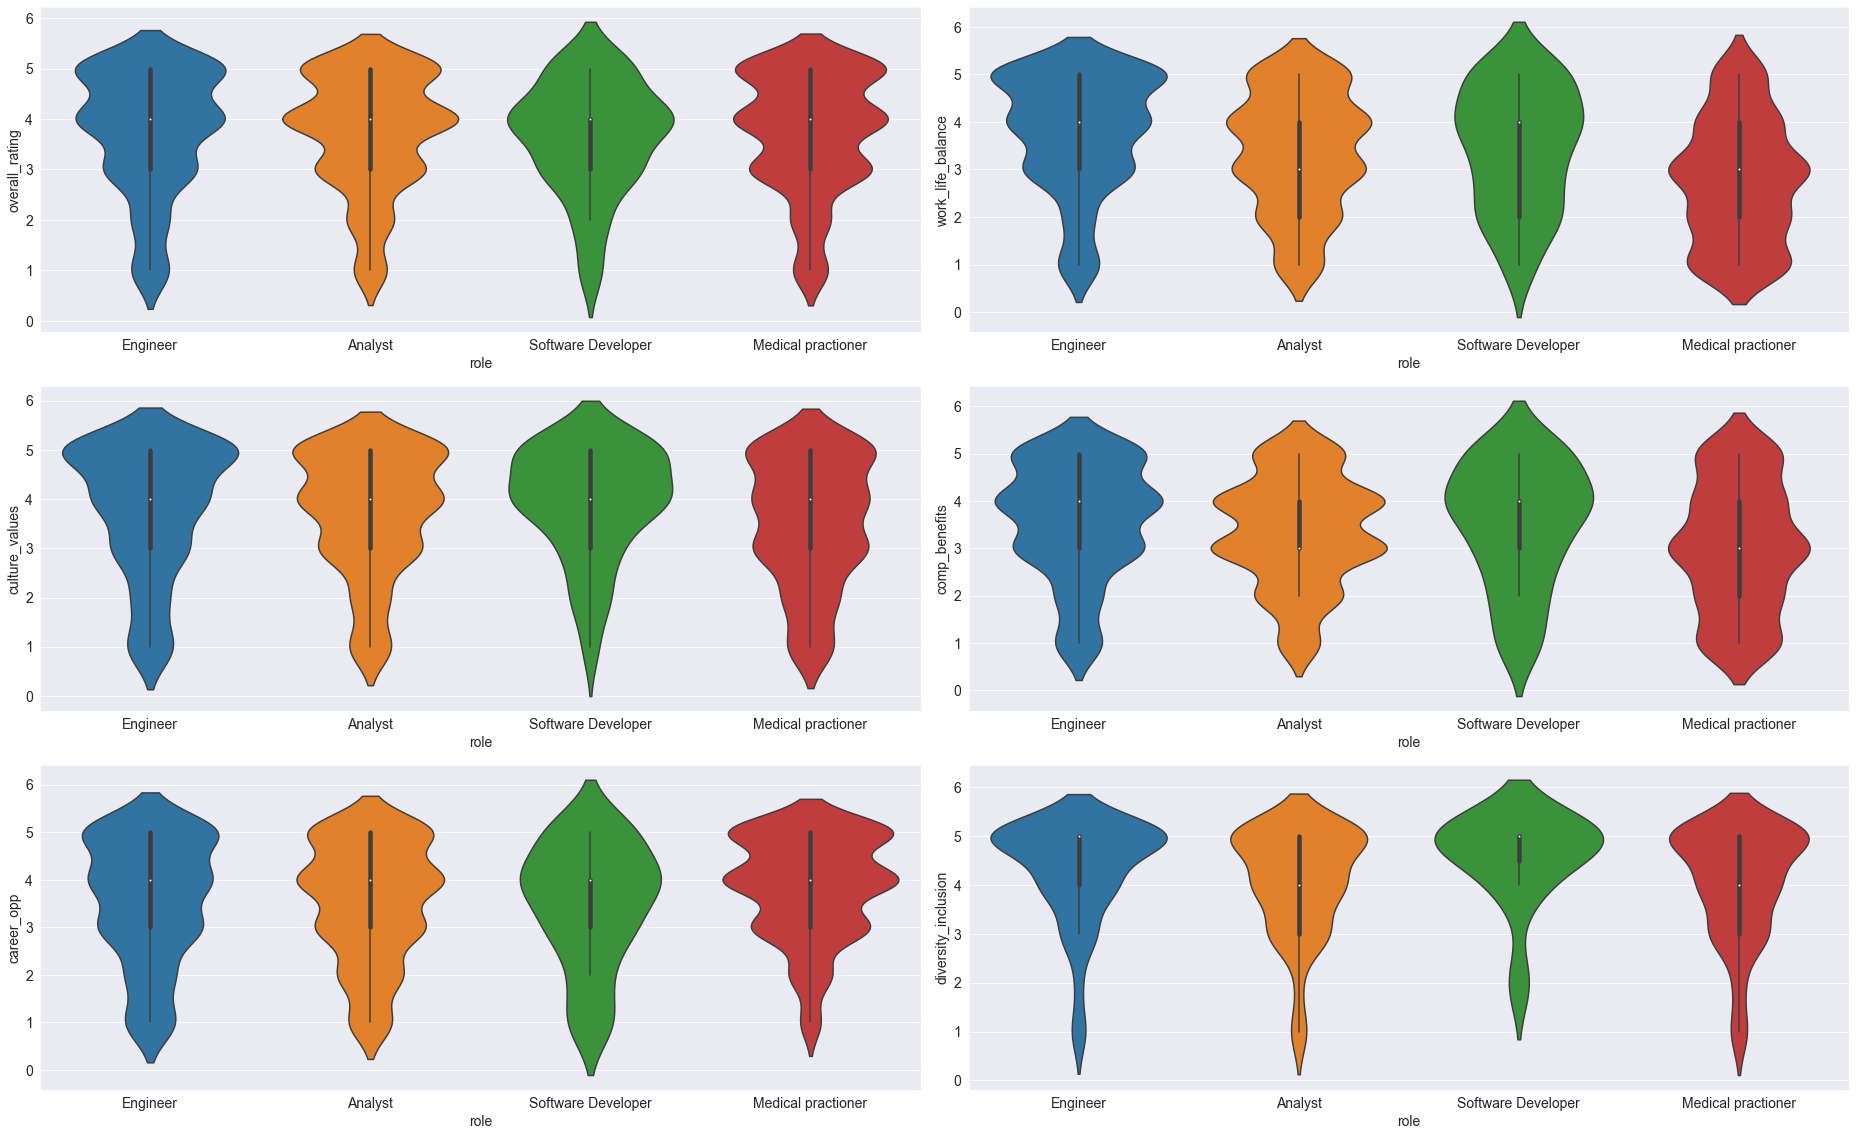

In [118]:
#For England
fig, axes = plt.subplots(3, 2, figsize=(26, 16))

#create boxplot in each subplot
sns.violinplot('role', 'overall_rating',data=four_roles[four_roles['location'].str.contains('England', na=False)], ax=axes[0,0]);
sns.violinplot('role', 'work_life_balance',data=four_roles[four_roles['location'].str.contains('England', na=False)], ax=axes[0,1]);
sns.violinplot('role', 'culture_values',data=four_roles[four_roles['location'].str.contains('England', na=False)], ax=axes[1,0]);
sns.violinplot('role', 'comp_benefits',data=four_roles[four_roles['location'].str.contains('England', na=False)], ax=axes[1,1]);
sns.violinplot('role', 'career_opp',data=four_roles[four_roles['location'].str.contains('England', na=False)], ax=axes[2,0]);
sns.violinplot('role', 'diversity_inclusion',data=four_roles[four_roles['location'].str.contains('England', na=False)], ax=axes[2,1]);

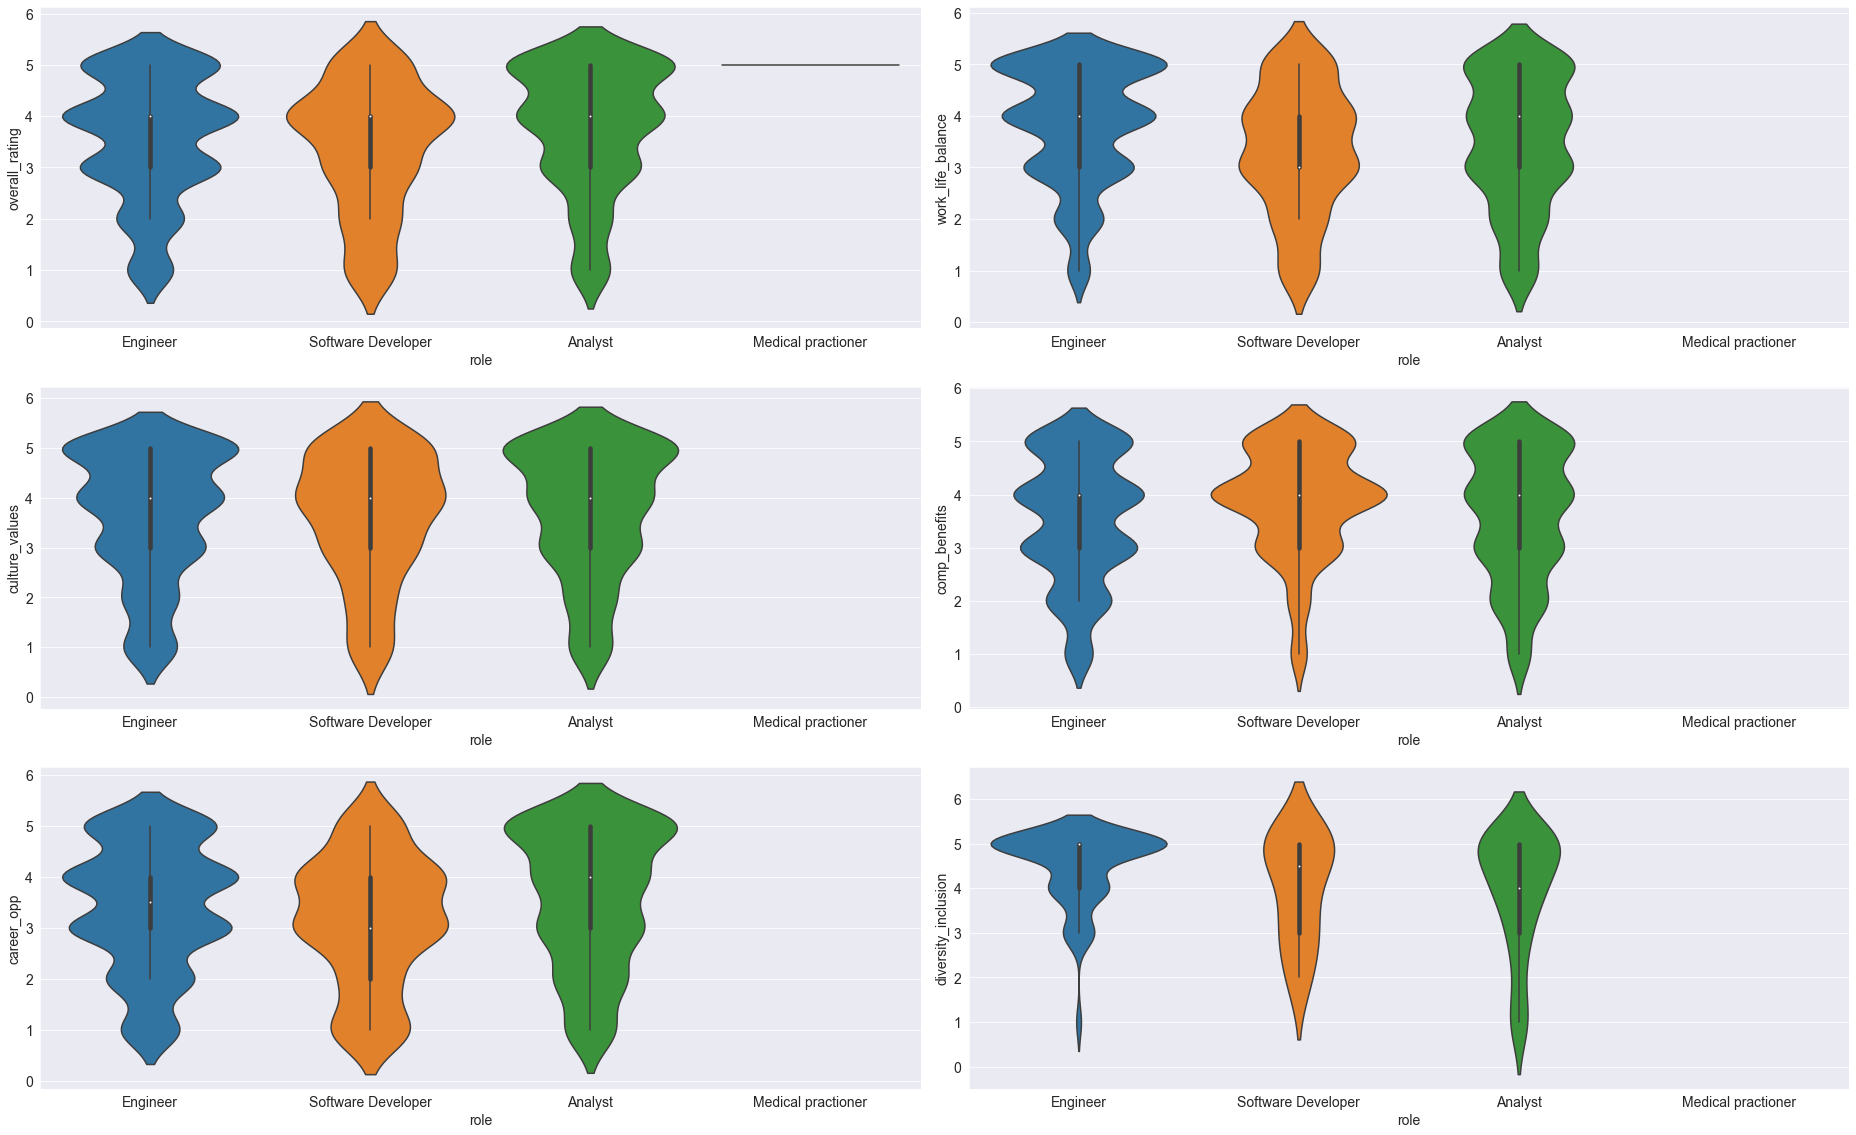

In [119]:
#For New York
fig, axes = plt.subplots(3, 2, figsize=(26, 16))

#create boxplot in each subplot
sns.violinplot('role', 'overall_rating',data=four_roles[four_roles['location'].str.contains(', NY', na=False)], ax=axes[0,0]);
sns.violinplot('role', 'work_life_balance',data=four_roles[four_roles['location'].str.contains(', NY', na=False)], ax=axes[0,1]);
sns.violinplot('role', 'culture_values',data=four_roles[four_roles['location'].str.contains(', NY', na=False)], ax=axes[1,0]);
sns.violinplot('role', 'comp_benefits',data=four_roles[four_roles['location'].str.contains(', NY', na=False)], ax=axes[1,1]);
sns.violinplot('role', 'career_opp',data=four_roles[four_roles['location'].str.contains(', NY', na=False)], ax=axes[2,0]);
sns.violinplot('role', 'diversity_inclusion',data=four_roles[four_roles['location'].str.contains(', NY', na=False)], ax=axes[2,1]);

What company out of the five firms have the highest recommendation and in what role? 
Where v= recommend, x= not recommend, o= indifferent

In [120]:
# v= recommend, x= not recommend, o= indifferent
six_firms['recommend'].value_counts()

v    7197
o    3572
x    3309
Name: recommend, dtype: int64

In [121]:
rec= six_firms[six_firms['recommend']== 'v']['firm'].value_counts()
rec

IBM                     2152
KPMG                    1402
NHS                     1316
Bloomberg-L-P           1202
Microsoft                637
McKinsey-and-Company     488
Name: firm, dtype: int64

In [122]:
n_rec= six_firms[six_firms['recommend']== 'x']['firm'].value_counts()
n_rec

IBM                     1619
KPMG                     531
Bloomberg-L-P            529
NHS                      444
Microsoft                126
McKinsey-and-Company      60
Name: firm, dtype: int64

In [123]:
i_rec= six_firms[six_firms['recommend']== 'o']['firm'].value_counts()
i_rec

NHS                     1166
IBM                      909
KPMG                     842
Bloomberg-L-P            380
McKinsey-and-Company     142
Microsoft                133
Name: firm, dtype: int64

>Recommended Companies(%)

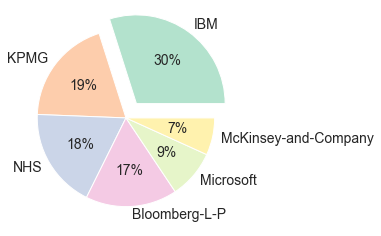

In [124]:
#For v= recommend
colors = sns.color_palette('Pastel2')[0:6]

plt.pie(rec, labels = rec.index, colors = colors, autopct='%.0f%%', explode = [0.2, 0, 0, 0, 0,0])

plt.show()

>Not recommended(%)

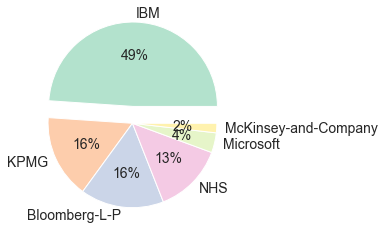

In [125]:
#For x= not recommend
colors = sns.color_palette('Pastel2')[0:6]

plt.pie(n_rec, labels = n_rec.index, colors = colors, autopct='%.0f%%', explode = [0.2, 0, 0, 0, 0,0])

plt.show()

>Indifferent Recommendation(%)

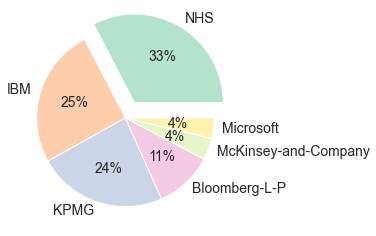

In [126]:
#For o= indifferent
colors = sns.color_palette('Pastel2')[0:6]

plt.pie(i_rec, labels = i_rec.index, colors = colors, autopct='%.0f%%', explode = [0.2, 0, 0, 0, 0,0])

plt.show()

## SENTIMENT ANALYSIS

In [133]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
six_firms['Subjectivity']= six_firms['headline'].apply(getSubjectivity)
six_firms['Polarity']= six_firms['headline'].apply(getPolarity)

#convert headline column to string
six_firms['headline']= six_firms['headline'].apply(str)
#six_firms

In [134]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
six_firms['Analysis'] = six_firms['Polarity'].apply(getAnalysis)
#six_firms

### Review Percentage (for all six firms, each firm and each role picked earlier)

>For all six firms (IBM, NHS, Bloomberg-L-P, Microsoft, Mckinsey and Company,KPMG)

In [142]:
preview= six_firms[six_firms.Analysis == 'Positive']
preview= preview['headline']

round((preview.shape[0] / five_firms.shape[0])*100, 1)

49.7

In [143]:
#Percentage of negative reviews
nreview= six_firms[six_firms.Analysis == 'Negative']
nreview= nreview['headline']

round((nreview.shape[0] / five_firms.shape[0])*100, 1)

7.4

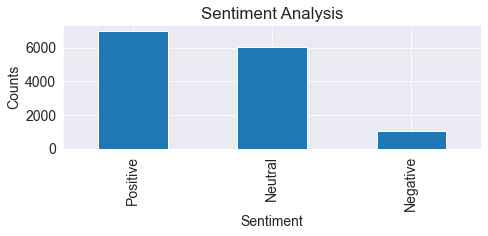

In [144]:
#show the value count

six_firms['Analysis'].value_counts()

#plot and visualize the count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
six_firms['Analysis'].value_counts().plot(kind='bar')
plt.show()

>For each firms

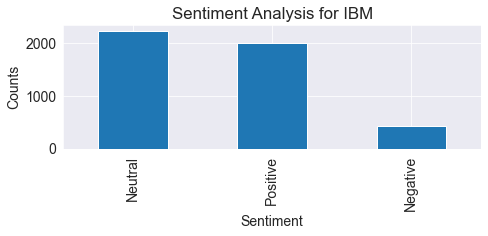

In [145]:
IBM= six_firms[six_firms['firm']=='IBM']
IBM['Analysis'].value_counts()

#plot and visualize the count
plt.title('Sentiment Analysis for IBM')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
IBM['Analysis'].value_counts().plot(kind='bar')
plt.show()

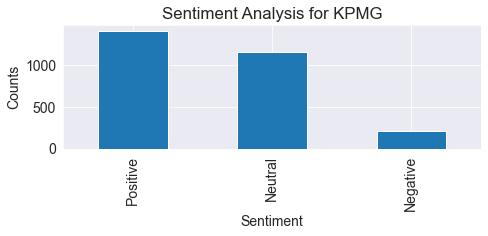

In [146]:
KPMG= six_firms[six_firms['firm']=='KPMG']
KPMG['Analysis'].value_counts()

#plot and visualize the count
plt.title('Sentiment Analysis for KPMG')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
KPMG['Analysis'].value_counts().plot(kind='bar')
plt.show()

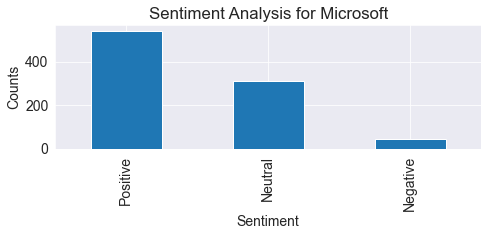

In [147]:
Microsoft= six_firms[six_firms['firm']=='Microsoft']
Microsoft['Analysis'].value_counts()

#plot and visualize the count
plt.title('Sentiment Analysis for Microsoft')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
Microsoft['Analysis'].value_counts().plot(kind='bar')
plt.show()

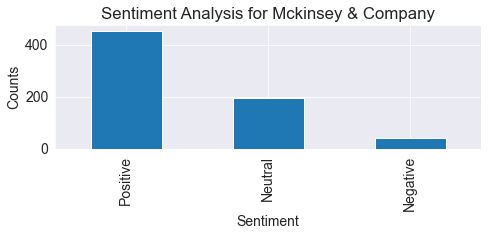

In [148]:
Mckinsey= six_firms[six_firms['firm']=='McKinsey-and-Company']
Mckinsey['Analysis'].value_counts()

#plot and visualize the count
plt.title('Sentiment Analysis for Mckinsey & Company')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
Mckinsey['Analysis'].value_counts().plot(kind='bar')
plt.show()

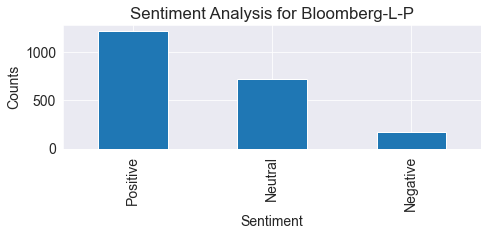

In [149]:
Bloomberg= six_firms[six_firms['firm']=='Bloomberg-L-P']
Bloomberg['Analysis'].value_counts()

#plot and visualize the count
plt.title('Sentiment Analysis for Bloomberg-L-P')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
Bloomberg['Analysis'].value_counts().plot(kind='bar')
plt.show()

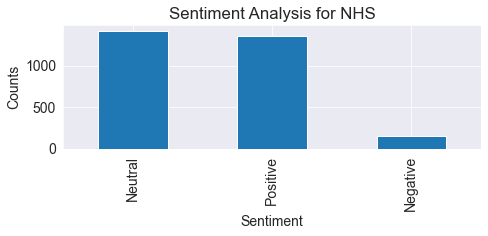

In [150]:
NHS= six_firms[six_firms['firm']=='NHS']
NHS['Analysis'].value_counts()

#plot and visualize the count
plt.title('Sentiment Analysis for NHS')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
NHS['Analysis'].value_counts().plot(kind='bar')
plt.show()

>For each role

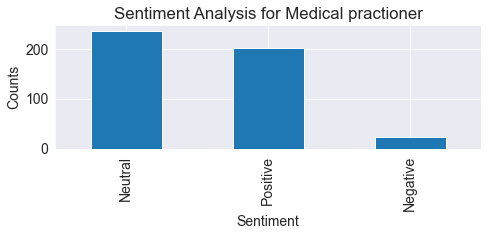

In [151]:
MP= six_firms[six_firms['role']=='Medical practioner']
MP['Analysis'].value_counts()

#plot and visualize the count
plt.title('Sentiment Analysis for Medical practioner')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
MP['Analysis'].value_counts().plot(kind='bar')
plt.show()

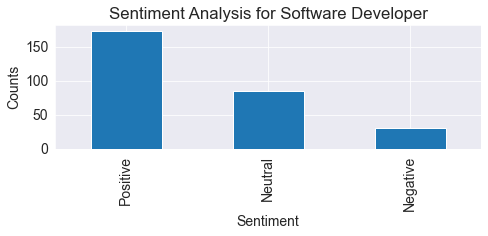

In [152]:
SD= six_firms[six_firms['role']=='Software Developer']
SD['Analysis'].value_counts()

#plot and visualize the count
plt.title('Sentiment Analysis for Software Developer')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
SD['Analysis'].value_counts().plot(kind='bar')
plt.show()

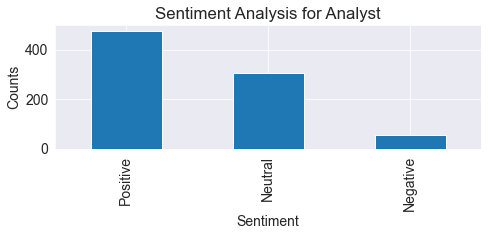

In [153]:
Analyst= six_firms[six_firms['role']=='Analyst']
Analyst['Analysis'].value_counts()

#plot and visualize the count
plt.title('Sentiment Analysis for Analyst')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
Analyst['Analysis'].value_counts().plot(kind='bar')
plt.show()

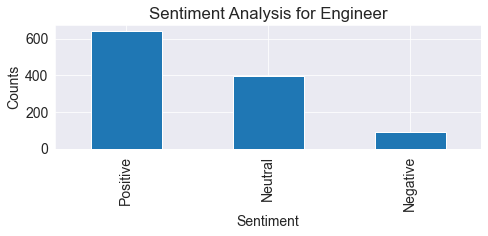

In [155]:
Engineer= six_firms[six_firms['role']=='Engineer']
Engineer['Analysis'].value_counts()

#plot and visualize the count
plt.title('Sentiment Analysis for Engineer')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
Engineer['Analysis'].value_counts().plot(kind='bar')
plt.show()

#### Creating csv files for recommendation for all firms(428) from parsed data. Opening this excel will aid easy filtering of any firm's recommendation, since there is alot of them

In [169]:
v=new_gd[new_gd['recommend']=='v']['firm'].value_counts()
v.columns=['firm', 'recommend']
pd.DataFrame(v)
v.to_csv('rec.csv')

x=new_gd[new_gd['recommend']=='x']['firm'].value_counts()
x.columns=['firm', 'n_recommend']
pd.DataFrame(x)
x.to_csv('not_rec.csv')

o=new_gd[new_gd['recommend']=='o']['firm'].value_counts()
o.columns=['firm', 'i_recommend']
pd.DataFrame(v)
o.to_csv('indiff_rec.csv')

#  Inferences and Conclusion

<b> Using England and New York data;

* We have 13 years of Reviews in the dataset (from 2008-01-31 to 2021-06-08)
* London(England) has the highest number of reviews(58665 reviews) and the least from Wolston(England), Brookland(England), Donnington(England), Ellesmere(England), Southampton in New York(1 review each)
* The firm with the hihest number of reviews is Tesco (5519 reviews) and the least is Deutsche-Bank(1663 reviews)
* There are huge percentage of reviewers who gave no job title(11466 reviews with no job title)
* In New York, we have firms such as Grosvenor-Casinos, Nando-s-UK-and-IRE, Wellington- Management, FARFETCH,Cisco-Sysytems, Cromwell-Tools, Boston-Consulting-Group etc with very good(>=4) overall rating reviews and firms such as GLL, Amey, Creative support,Babylon-Health, Scottish-Widows etc with poor reviews(<=3)
* In England, we have firms such as Cygnet-Health-Care, Arnold Clark, Grosvenor Casinos, Dalata Hotel Group, Bullhorn, Blue-Yonder etc with good reviews and Barchester Healthcare, Wakefield Council, National Star, University of Liverpool etc with poor overall rating reviews
* ALso notice that some firms exist both in England and New York. For instance; Sotheby-s, Grosvenor Casinos, Bullhorn, University of Hull

<b> Looking into six firms ('McKinsey-and-Company', 'Microsoft','NHS','IBM', 'KPMG','Bloomberg-L-P')

<b> In New York;

<b> Overall Rating;
- for IBM, majority reviews were 3-4
- for IKPMG, majority reviews were 3-4
- for Bloomberg, majority reviews were 3-4
- for Mckinsey and company, majority reviews were 4-5
- for Microsoft, majority reviews were 4-5
- for NHS, majority reviews were 3-5

<b> Worklife balance;
- for IBM, majority reviews were 3-5
- for KPMG, majority reviews were 2-3 and 3-4
- for Bloomberg, majority reviews were 2-3 and 3-4
- for Mckinsey and company, majority reviews were 2-3 and 3-4
- for Microsoft, majority reviews were 3-4 and 4-5
- for NHS, majority reviews were 2.5-3.5

<b> Company's benefit;
- for IBM, majority reviews were 2-3 and 3-4
- for KPMG, majority reviews were 3-4
- for Bloomberg, majority reviews were 3-4 and 4-5
- for Mckinsey and company, majority reviews were 4-5
- for Microsoft, majority reviews were 4-5
- for NHS, majority reviews were 2.0-3.5


<b> In England;

<b> Overall Rating;
- for IBM, majority reviews were 3-4
- for IKPMG, majority reviews were 3-4
- for Bloomberg, majority reviews were 3-4 and 4-5
- for Mckinsey and company, majority reviews were 4-5
- for Microsoft, majority reviews were 3-4 and 4-5
- for NHS, majority reviews were 3-4 and 4-5

<b> Worklife balance;
- for IBM, majority reviews were 3-5
- for KPMG, majority reviews were 2-3 and 3-4
- for Bloomberg, majority reviews were 2-3 and 3-4
- for Mckinsey and company, majority reviews were 2-3 
- for Microsoft, majority reviews were 3-4 and 4-5
- for NHS, majority reviews were 2-3 and 3-4

<b> Company's benefit;
- for IBM, majority reviews were 2-3 and 3-4
- for KPMG, majority reviews were 2-3 and 3-4
- for Bloomberg, majority reviews were 3-4 
- for Mckinsey and company, majority reviews were 3-5
- for Microsoft, majority reviews were 4-5
- for NHS, majority reviews were 3-4 and 4-5



<b> Look to the visualizations for more inferences on job title reviews

<b> Recommendation

- Recommended; IBM(30%),KPMG(19%), NHS(18%), Bloomberg(17%), Microsoft(9%), Mckinsey and company(7%)
- Not Recommended; IBM(49%),KPMG(16%), NHS(13%), Bloomberg(16%), Microsoft(4%), Mckinsey and company(2%)
- Indifferent; IBM(25%),KPMG(24%), NHS(33%), Bloomberg(11%), Microsoft(4%), Mckinsey and company(4%)

<b> Sentiment Analysis for firms

- Overall, there are more positive reviews across the six firms more than negative and neutral reviews
- In IBM, there are more neutral than positive and more positive than negative reviews
- In KPMG, there are more positive reviews than neutral and more neutral than negative reviews
- In Bloomberg, there are more positive reviews than neutral and more neutral than negative reviews
- In Microsoft, there are more positive reviews than neutral and more neutral than negative reviews
- In NHS, there are more neutral than positive and more positive than negative reviews
- In Mckinsey and company, there are more positive reviews than neutral and more neutral than negative reviews

<b> Sentiment Analysis for job titles

- Overall, there are more positive reviews across the six firms more than negative and neutral reviews
- For medical practioner, there are more neutral than positive and more positive than negative reviews
- For Software Developer, there are more positive reviews than neutral and more neutral than negative reviews
- For Analyst, there are more positive reviews than neutral and more neutral than negative reviews
- For Engineer, there are more positive reviews than neutral and more neutral than negative reviews

